# Lending Club Case Study Notebook

## Introduction
### Goal:
How data can be used minimize the risk of losing money while lending to customers.
### Context of Problem:
- This company is the largest **online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures**.
- Borrowers can easily access lower interest rate loans through a fast online interface.
- Like most other lending companies, lending loans to **‘risky’** applicants is the largest source of financial loss (called credit loss).
- **Credit loss** is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 
### Target:
Reduce the Credit Loss by using EDA techniques to find driving factors for the defaulting of loan.
### Risk associated with the problem:
 - If the applicant is likely to repay the loan, then not approving loan is a loss of business (rejecting loans for non - default).
 - If the applicant is not likely to repay the loan, then approving loan may lead to financial loss (approving loans for default).
The given dataset contains information about past loans and each row represents the loan details of the applicants.

In [420]:
# Steps of analysis:
# 1. Data Understanding
# 2. Data Wrangling
# 3. Data Visualization and Analysis
# 4. Conclusion

In [1]:
# Importing the Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Loading the Data set into Data Frame using Pandas library

df = pd.read_csv("loan.csv", low_memory=False)

# Setting the low_memory as false ensures pandas to process the file in chunks, which can reduce memory usage.

In [3]:
# Fetching the Top 5 Rows using Head Function to preview the data loaded into data frame

df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
# To get a Comprehensive View of the Data Frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# Identifying the Count of Rows and Columns in the Data Frame loaded using Shape Function

df.shape

# Total Number of Rows - 39,717
# Total Number of Columns - 111

(39717, 111)

In [6]:
# Identifying the Columns Data Types using dtpes functions

df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [7]:
# Identifying the Null Values w.r.t each column to better understand the data

df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
# Identifying the missing values and quantifying it into percent values to get a better estimate on Missing Values of each column

missing_percentage = (df.isnull().sum() / len(df)) * 100

# Converting the data frame to dictionary '

missing_percentage_dict = missing_percentage.to_dict()

# Sorting the values in the descending Order based on the Null Values %

sorted_missing_percentage = dict(sorted(missing_percentage_dict.items(), key=lambda item: item[1], reverse=True))

# Iterating through dictionary to display the values

for column, percentage in sorted_missing_percentage.items():
    print(f"{column}: {percentage:.2f}%")

mths_since_last_major_derog: 100.00%
annual_inc_joint: 100.00%
dti_joint: 100.00%
verification_status_joint: 100.00%
tot_coll_amt: 100.00%
tot_cur_bal: 100.00%
open_acc_6m: 100.00%
open_il_6m: 100.00%
open_il_12m: 100.00%
open_il_24m: 100.00%
mths_since_rcnt_il: 100.00%
total_bal_il: 100.00%
il_util: 100.00%
open_rv_12m: 100.00%
open_rv_24m: 100.00%
max_bal_bc: 100.00%
all_util: 100.00%
total_rev_hi_lim: 100.00%
inq_fi: 100.00%
total_cu_tl: 100.00%
inq_last_12m: 100.00%
acc_open_past_24mths: 100.00%
avg_cur_bal: 100.00%
bc_open_to_buy: 100.00%
bc_util: 100.00%
mo_sin_old_il_acct: 100.00%
mo_sin_old_rev_tl_op: 100.00%
mo_sin_rcnt_rev_tl_op: 100.00%
mo_sin_rcnt_tl: 100.00%
mort_acc: 100.00%
mths_since_recent_bc: 100.00%
mths_since_recent_bc_dlq: 100.00%
mths_since_recent_inq: 100.00%
mths_since_recent_revol_delinq: 100.00%
num_accts_ever_120_pd: 100.00%
num_actv_bc_tl: 100.00%
num_actv_rev_tl: 100.00%
num_bc_sats: 100.00%
num_bc_tl: 100.00%
num_il_tl: 100.00%
num_op_rev_tl: 100.00%
num_r

In [9]:
# Identifying the Columns that has 100% Missing Values

columns_with_100_missing = df.columns[df.isna().all()].tolist()

# Fetching the Count of Columns that has 100 % Missing Values 

count_100_missing = len(df.columns[df.isna().all()].tolist())

# Displaying the Column Count with 100% missing values

print(f"Number of columns with 100% missing values: {count_100_missing}")

# Displaying the Columns with 100% missing values

print("\nColumns with 100% missing values:\n\n", columns_with_100_missing)

Number of columns with 100% missing values: 54

Columns with 100% missing values:

 ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_7

## Data Cleaning

#### Columns with 100% Missing Values

- mths_since_last_major_derog
- annual_inc_joint
- dti_joint
- verification_status_joint
- tot_coll_amt
- tot_cur_bal
- open_acc_6m
- open_il_6m
- open_il_12m
- open_il_24m
- mths_since_rcnt_il
- total_bal_il
- il_util
- open_rv_12m
- open_rv_24m
- max_bal_bc
- all_util
- total_rev_hi_lim
- inq_fi
- total_cu_tl
- inq_last_12m
- acc_open_past_24mths
- avg_cur_bal
- bc_open_to_buy
- bc_util
- mo_sin_old_il_acct
- mo_sin_old_rev_tl_op
- mo_sin_rcnt_rev_tl_op
- mo_sin_rcnt_tl
- mort_acc
- mths_since_recent_bc
- mths_since_recent_bc_dlq
- mths_since_recent_inq
- mths_since_recent_revol_delinq
- num_accts_ever_120_pd
- num_actv_bc_tl
- num_actv_rev_tl
- num_bc_sats
- num_bc_tl
- num_il_tl
- num_op_rev_tl
- num_rev_accts
- num_rev_tl_bal_gt_0
- num_sats
- num_tl_120dpd_2m
- num_tl_30dpd
- num_tl_90g_dpd_24m
- num_tl_op_past_12m
- pct_tl_nvr_dlq
- percent_bc_gt_75
- tot_hi_cred_lim
- total_bal_ex_mort
- total_bc_limit
- total_il_high_credit_limit

In [12]:
# Dropping the Columns with 100% Missing Values [Axis = 1 => Selecting Columns]

df = df.dropna(axis = 1, how = 'all')

# Successfully dropped 54 Columns with 100 % Missing Values

In [13]:
# Verifying the Shape of Data Frame after Dropping the Columns with 100% Missing Values

df.shape

# Observation : Column Count reduced from 111 to 57

(39717, 57)

#### Dropping the below columns based on the below Observations from Data

- `next_pymnt_d` - Noticed around 97.13% of Missing Values
- `mths_since_last_record` - Noticed around 92.99% of Missing Values
- `mths_since_last_deliq`n - Noticed around 64.66% of Missing Value
- `desc` - The Data that has been provided contains text or description provided by borrower <br> Since it is highly unstructured in nature it will not aid in Analysis towards the problem statement <br> Also noticed around 32.59% of missing values

In [15]:
# Dropping the Columns that has Significant percentage of Null Values which does not aid in analysis

df = df.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'], axis = 1)

# Successfully dropped 4 more Columns with Significant Missing Values

In [16]:
# Verifying the Shape of Data Frame after Dropping the Columns that has Significant percentage of Null Values

df.shape

# Observation : Column Count reduced from 57 to 53

(39717, 53)

#### Dropping the below columns based on the below Observations from Data

- `acc_now_delinq` - Since, all Values of the column are Zero, it cannot be used for analysis.
- `delinq_amnt` - Since, all Values of the column are Zero, it cannot be used for analysis.
- `application_type`, `initial_list_status`, `policy_code`, `pymnt_plan` - All the columns mentioned contains single value in all rows. Hence, it will not aid in analysis.

In [18]:
# Dropping the Columns that has either Zero Values or Single Value in all rows which does not aid in analysis

df = df.drop(['acc_now_delinq','delinq_amnt','application_type','initial_list_status','policy_code', 'pymnt_plan'], axis = 1)

# Successfully dropped 6 more Columns that has either Zero Values or Single Value in all rows

In [19]:
# Verifying the Shape of Data Frame after Dropping the Columns that has either Zero Values or Single Value in all rows

df.shape

# Observation : Column Count reduced from 53 to 47

(39717, 47)

#### Dropping the below columns based on the below Observations from Data

- `chargeoff_within_12_mths:` Values are either 0 (count: 39,661) or NA (count: 56).
- `collection_recovery_fee:` Values are either 0 (count: 35,935) or categorized as Others (count: 3,782).
- `collections_12_mths_ex_med:` Values are either 0 (count: 39,662) or NA (count: 57).
- `out_prncp:` Values are either 0 (count: 38,577) or categorized as Others (count: 1,140).
- `out_prncp_inv:` Values are either 0 (count: 38,577) or categorized as Others (count: 1,140).
- `pub_rec:` Values are either 0 (count: 37,601) or fall within the categories 1, 2, 3, or 4 (count: 2,116).
- `pub_rec_bankruptcies:` Values are either 0 (count: 37,339), fall within categories 1 or 2 (count: 1,681), or are NA (count: 697).
- `tax_liens:` Values are either 0 (count: 39,678) or NA (count: 39)
- `delinq_2yrs:` Most of the values are Zeros (count: 35,406)
- `total_rec_late_fee:` Most of the values are Zeros (count: 37,671)

Since all the values in the above columns are ZERO, this would not aid in Analysis.

In [21]:
# Dropping the Columns that has more than 90% of data as ZEROS, which does not aid in analysis

df = df.drop(['chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'out_prncp', 'out_prncp_inv', 'pub_rec', 
               'pub_rec_bankruptcies', 'tax_liens', 'delinq_2yrs', 'total_rec_late_fee'], axis=1)

# Successfully dropped 10 more Columns that has more than 90% of data as ZEROS.

In [22]:
# Verifying the Shape of Data Frame after Dropping the Columns that has either Zero Values or Single Value in all rows

df.shape

# Observation : Column Count reduced from 47 to 37

(39717, 37)

#### Dropping the below columns based on the below Observations from Data

- `emp_title:` Not needed for analysis. Hence to be ignored.
- `funded_amnt_inv:` Not needed for analysis. Hence to be ignored.
- `total_pymnt_inv:` Not needed for analysis. Hence to be ignored.
- `member_id:` Not needed for analysis. Hence to be ignored.
- `title:` Not needed for analysis. Vague data. Hence to be ignored.
- `url:` Not needed for analysis. Vague data. Hence to be ignored.
- `zip_code:` Not needed for analysis. Hence to be ignored.

The data present in the above columns does not aid for analysis, as these are descriptive in nature.

In [24]:
# Dropping the Columns that has data which is descriptive in nature as they won't aid in analysis

df = df.drop(['emp_title', 'funded_amnt_inv', 'member_id', 'title', 'url', 'zip_code', 'total_pymnt_inv', 'last_credit_pull_d', 'last_pymnt_amnt'], axis=1)

# Successfully dropped 9 more Columns that has data which is descriptive in nature.

In [25]:
# Verifying the Shape of Data Frame after Dropping the Columns that has either Zero Values or Single Value in all rows

df.shape

# Observation : Column Count reduced from 37 to 28

(39717, 28)

In [26]:
# Dropping the Last Payment Date "last_pymnt_d" column as it won't aid in any analysis

df = df.drop('last_pymnt_d', axis=1)

In [27]:
# Verifying the Shape of Data Frame after Dropping the "last_pymnt_d" column as it won't aid in any analysis

df.shape

# Observation : Column Count reduced from 28 to 27

(39717, 27)

In [28]:
# Checking for duplicate rows in dataframe

df.drop_duplicates().count()

# Observation : No duplicate rows noticed.

id                     39717
loan_amnt              39717
funded_amnt            39717
term                   39717
int_rate               39717
installment            39717
grade                  39717
sub_grade              39717
emp_length             38642
home_ownership         39717
annual_inc             39717
verification_status    39717
issue_d                39717
loan_status            39717
purpose                39717
addr_state             39717
dti                    39717
earliest_cr_line       39717
inq_last_6mths         39717
open_acc               39717
revol_bal              39717
revol_util             39667
total_acc              39717
total_pymnt            39717
total_rec_prncp        39717
total_rec_int          39717
recoveries             39717
dtype: int64

In [29]:
# Finding the data types for all columns.

df.dtypes

id                       int64
loan_amnt                int64
funded_amnt              int64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
revol_bal                int64
revol_util              object
total_acc                int64
total_pymnt            float64
total_rec_prncp        float64
total_rec_int          float64
recoveries             float64
dtype: object

### Data Segmentation for EDA Analysis

In this analysis, we aim to categorize various features of our dataset into specific segments to facilitate exploratory data analysis (EDA). The columns have been divided into three categories:

- **Categorical**: Features that are categorical in nature, which will be useful for categorical analysis and visualizations.
- **Numerical**: Features that are numerical, which will allow for statistical analysis and numerical visualizations.
- **Not Required**: Features that will not be used in the analysis.

This structured approach will help streamline the analysis process and focus on relevant data.

In [366]:
# Define the columns for each category
not_required_columns = [
    'acc_now_delinq', 'acc_open_past_24mths', 'all_util', 'annual_inc_joint',
    'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
    'collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_amnt',
    'desc', 'emp_title', 'fico_range_high', 'fico_range_low',
    'funded_amnt_inv', 'il_util', 'initial_list_status', 'inq_fi',
    'inq_last_12m', 'inq_last_6mths', 'last_fico_range_high', 'last_fico_range_low',
    'max_bal_bc', 'member_id', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
    'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq',
    'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il',
    'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
    'mths_since_recent_revol_delinq', 'next_pymnt_d', 'num_accts_ever_120_pd',
    'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
    'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
    'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
    'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m',
    'open_rv_24m', 'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
    'policy_code', 'pub_rec', 'pub_rec_bankruptcies', 'pymnt_plan', 'tax_liens',
    'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 'total_cu_tl',
    'total_il_high_credit_limit', 'total_rev_hi_lim', 'url', 'verification_status_joint','last_pymnt_amnt',
    'zip_code', 'last_pymnt_d', 'last_credit_pull_d', 'dti_joint', 'delinq_2yrs', 'total_pymnt_inv', 'total_rec_late_fee'
]

categorical_columns = [
    'id', 'addr_state', 'earliest_cr_line', 'emp_length', 'grade', 'home_ownership',
    'inq_last_6mths', 'int_rate', 'issue_d', 'loan_status',
    'purpose', 'recoveries', 'sub_grade', 'term', 'total_acc',
    'verification_status'
]

numerical_columns = [
    'annual_inc', 'dti', 'funded_amnt',
    'installment', 'loan_amnt', 'open_acc', 'revol_bal',
    'total_pymnt', 'total_rec_int',
    'total_rec_prncp', 'revol_util'
]

# Print the lists for verification
print("Not Required Columns: (" + str(len(not_required_columns)) + ")")
print(not_required_columns)
print("\nCategorical Columns: (" + str(len(categorical_columns)) + ")")
print(categorical_columns)
print("\nNumerical Columns: (" + str(len(numerical_columns)) + ")")
print(numerical_columns)

Not Required Columns: (84)
['acc_now_delinq', 'acc_open_past_24mths', 'all_util', 'annual_inc_joint', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_amnt', 'desc', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt_inv', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'last_fico_range_high', 'last_fico_range_low', 'max_bal_bc', 'member_id', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 

### Data Imputation: Categorical Variables

In [33]:
df[categorical_columns].dtypes

id                       int64
addr_state              object
earliest_cr_line        object
emp_length              object
grade                   object
home_ownership          object
inq_last_6mths           int64
int_rate                object
issue_d                 object
loan_status             object
purpose                 object
recoveries             float64
sub_grade               object
term                    object
total_acc                int64
verification_status     object
dtype: object

In [34]:
# Finding the columns that still has null values for performing data imputation.

data_cat_NeedImpute = [x for x in df[categorical_columns].columns if df[x].isnull().sum() > 0]

# 1 column is identifed.

In [35]:
# Fetching the existing datatypes of the columns that needs imputation.

df[data_cat_NeedImpute].dtypes

emp_length    object
dtype: object

In [36]:
# Determininig the value counts for "emp_length" column

df["emp_length"].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [37]:
# Finding the mode for "emp_length" column

df["emp_length"].mode()[0]

'10+ years'

In [38]:
# Perform Imputation on "emp_length" with Mode value

df.fillna({"emp_length": df["emp_length"].mode()[0]}, inplace=True)

In [39]:
# Validating the impact of data imputation on "emp_length" column

df["emp_length"].isnull().sum()

0

### Data Imputation: Numerical Variables


In [41]:
# Verifying the data types of all Numerical variables.

df[numerical_columns].dtypes

annual_inc         float64
dti                float64
funded_amnt          int64
installment        float64
loan_amnt            int64
open_acc             int64
revol_bal            int64
total_pymnt        float64
total_rec_int      float64
total_rec_prncp    float64
revol_util          object
dtype: object

In [42]:
# Determininig the value counts for "revol_util" column

df["revol_util"].value_counts()

revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64

In [43]:
# Validating the impact of data imputation on "emp_length" column

df["revol_util"].isnull().sum()

50

In [44]:
df["revol_util"].dtype

dtype('O')

In [45]:
# Data Imputation: "revol_util"

# Step-1: Removing % from each value

df["revol_util"] = df["revol_util"].apply(lambda x: str(x).replace("%",""))

# Step-2: Converting the datatype of the column from Object to Float

df["revol_util"] =  df["revol_util"].astype(float)

# Step-3: Validating the datatype after conversion.

df["revol_util"].dtype

dtype('float64')

In [46]:
# Step-4: Fetching the median of "revolv_util"

print(df["revol_util"].median())

# Step-5: Fill NA with median value in "revolv_util" column

df.fillna({"revol_util": df["revol_util"].median()}, inplace=True)

49.3


In [47]:
# Validating the impact of data imputation on "revol_util" column

df["revol_util"].isnull().sum()

0

In [48]:
# Verifying the value counts to check pending numerical columns for Imputation.

df[numerical_columns].isnull().sum()

# Observation: Found none. All are in good shape.

annual_inc         0
dti                0
funded_amnt        0
installment        0
loan_amnt          0
open_acc           0
revol_bal          0
total_pymnt        0
total_rec_int      0
total_rec_prncp    0
revol_util         0
dtype: int64

### Data Imputation: "Current" Loan Status

In [50]:
# Checking the no. of rows associated with each loan status

df["loan_status"].value_counts()

# Observation: There are 1140 rows with 'Current' Loan Status

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

##### Action: Removing the rows with 'Current' Loan Status
##### Reason:
- They won't aid in analysis as the Problem statement is only about 'Charged Off' criteria.
- Also we don't have enough data to work on 'Current' status analysis.

In [52]:
# Removing the rows with 'Current' Status and assigning the resulting dataframe to original dataframe.

df = df[df["loan_status"] != "Current"]

In [53]:
# Verifying the Shape of Data Frame after removing the rows with Loan Status = 'Current'

df.shape

# Observation : Row Count reduced from 39717 to 38577

(38577, 27)

## Univariate Analysis - Numerical Columns:

In [55]:
# Fetching the Statistical data for Numerical columns [That we categorized]

df[numerical_columns].describe()

annual_inc           dti   funded_amnt   installment     loan_amnt  \
count  3.857700e+04  38577.000000  38577.000000  38577.000000  38577.000000   
mean   6.877797e+04     13.272727  10784.058506    322.466318  11047.025430   
std    6.421868e+04      6.673044   7090.306027    208.639215   7348.441646   
min    4.000000e+03      0.000000    500.000000     15.690000    500.000000   
25%    4.000000e+04      8.130000   5200.000000    165.740000   5300.000000   
50%    5.886800e+04     13.370000   9550.000000    277.860000   9600.000000   
75%    8.200000e+04     18.560000  15000.000000    425.550000  15000.000000   
max    6.000000e+06     29.990000  35000.000000   1305.190000  35000.000000   

           open_acc      revol_bal   total_pymnt  total_rec_int  \
count  38577.000000   38577.000000  38577.000000   38577.000000   
mean       9.275423   13289.489826  11866.970365    2119.243370   
std        4.401588   15866.492241   8809.856227    2389.499511   
min        2.000000       0.000000      0.000000       0.000000   
25%        6.000000    3650.000000   5513.497338     643.990000   
50%        9.000000    8762.000000   9674.048405    1300.450000   
75%       12.000000   16912.000000  16136.952430    2671.980000   
max       44.000000  149588.000000  58563.679930   23563.680000   

       total_rec_prncp    revol_util  
count     38577.000000  38577.000000  
mean       9648.322898     48.703551  
std        7009.381200     28.346361  
min           0.000000      0.000000  
25%        4500.000000     25.200000  
50%        8000.000000     49.100000  
75%       13175.000000     72.200000  
max       35000.020000     99.900000

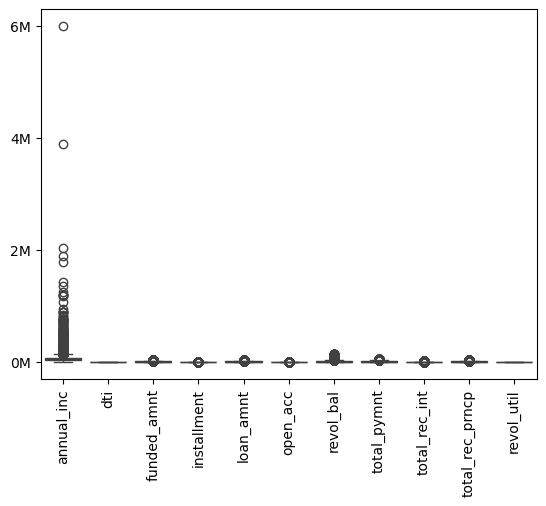

In [56]:
# Create boxplot for numerical columns
sns.boxplot(data=df[numerical_columns])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set y-axis ticks with intervals of 0.1 (customized as per your range)
ticks = np.arange(0,8000000,2000000)

# Creating a Num Py Array using arange function i.e., Starting from 0 to 6 Million with 1 Million as kind of step size
labels = ["{}M".format(i//1000000) for i in ticks] 

# List Comprehension - Loop through each value in ticks numpy array and perform floor division with 1 Million and append the returned value with M for meaningful tick] 
plt.yticks(ticks,labels) # Customizing Yticks

# Display the plot
plt.show()

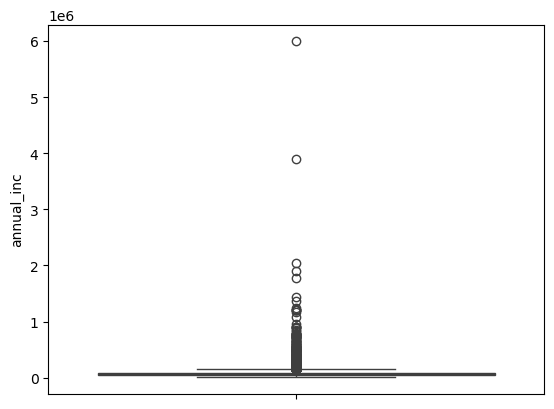

In [57]:
# Finding the Outliers for the column 'annual_inc' using Box Plot

sns.boxplot(df["annual_inc"])
plt.show()

# Observation: This implies that there are clear Outliers, which tamper the analysis. Hence to be treated.

In [58]:
# Finding the Upper Fence, to understand the maximum data points that can be considered for analysis

IQR = np.percentile(df["annual_inc"], 75) - np.percentile(df["annual_inc"], 25)
print("Inter Quartile Range: ", IQR)

# Upper Whisker = 1.5*IQR + Q3
UpperFence = 1.5*IQR + np.percentile(df["annual_inc"], 75)
print("Upper Fence: ", UpperFence)

Inter Quartile Range:  42000.0
Upper Fence:  145000.0


In [59]:
# Based on the above inference, calculating Percentiles to determine the spread of data points.

print("90 Percentile: ", np.percentile(df["annual_inc"], 90))
print("93 Percentile: ", np.percentile(df["annual_inc"], 93))
print("95 Percentile: ", np.percentile(df["annual_inc"], 95))

90 Percentile:  115000.0
93 Percentile:  127500.0
95 Percentile:  140004.0


In [60]:
# It can be observed that the data points beyond 95 Percentile are clearly Outliers. Hence trimming them out.

annual_inc_below_95 = np.percentile(df["annual_inc"], 95)

df = df[df["annual_inc"] <= annual_inc_below_95]

In [61]:
# Verifying the Shape of Data Frame after treating Outliers

df.shape

# Observation : Row Count reduced from 38577 to 36654.
# No. of rows removed: 1923

(36654, 27)

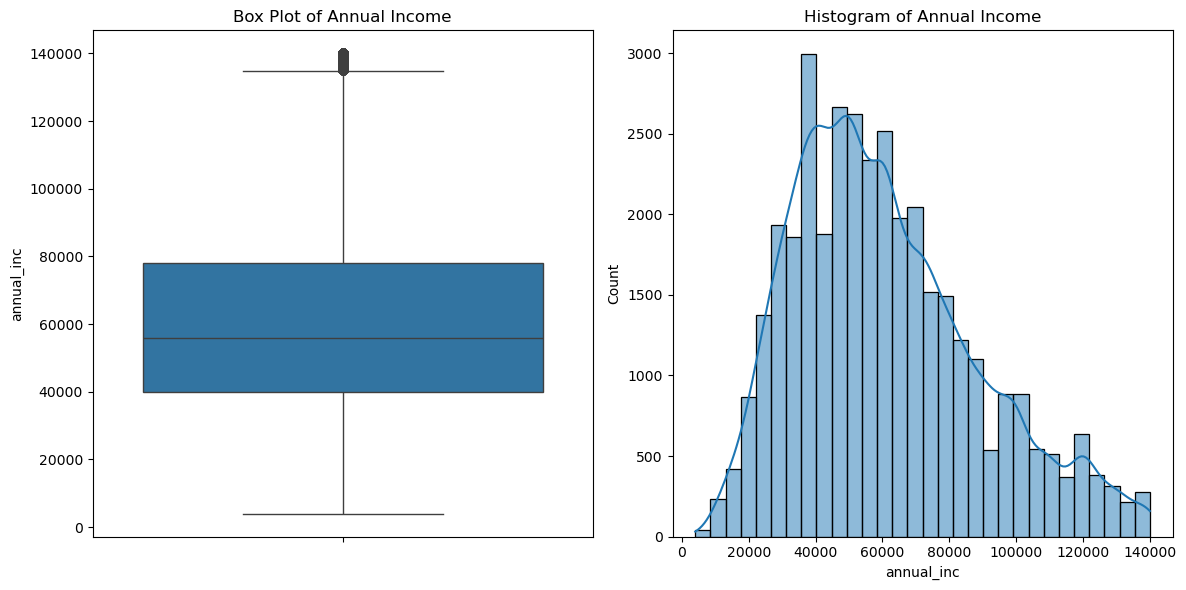

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(df["annual_inc"], ax=axes[0])
axes[0].set_title("Box Plot of Annual Income")

# Histogram on the second axis
sns.histplot(df["annual_inc"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Histogram of Annual Income")

# Display the plots side by side
plt.tight_layout()
plt.show()

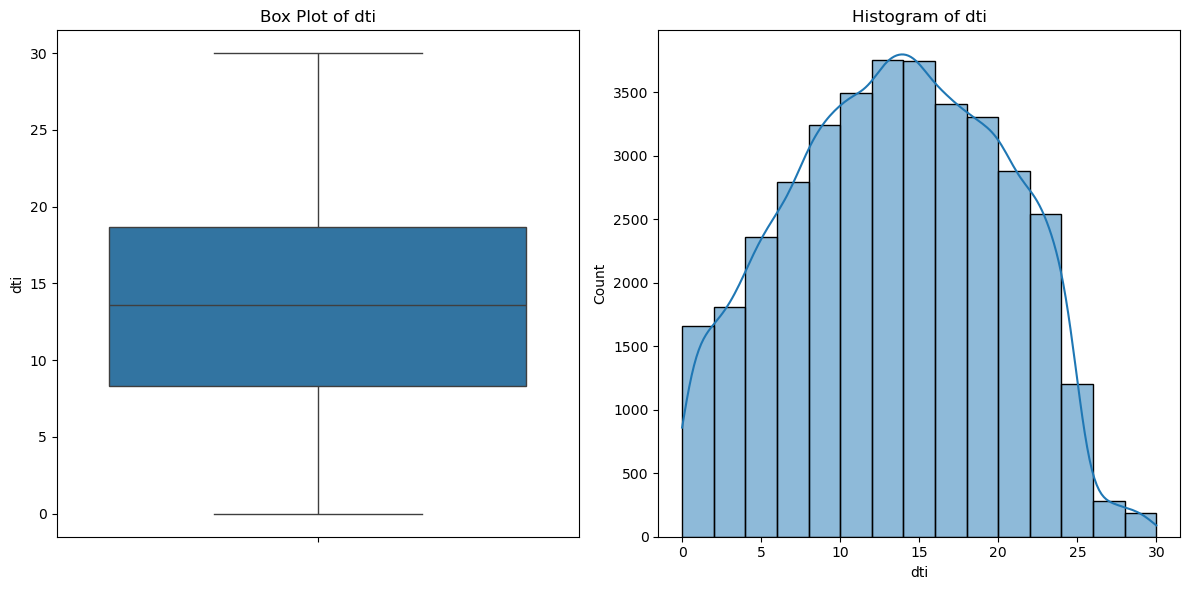

In [63]:
# Plotting for the column: dti

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(df["dti"], ax=axes[0])
axes[0].set_title("Box Plot of dti")

# Histogram on the second axis
sns.histplot(df["dti"], bins=15, kde=True, ax=axes[1])
axes[1].set_title("Histogram of dti")

# Display the plots side by side
plt.tight_layout()
plt.show()

# Observations: No Outliers are found. Hence no treating required.

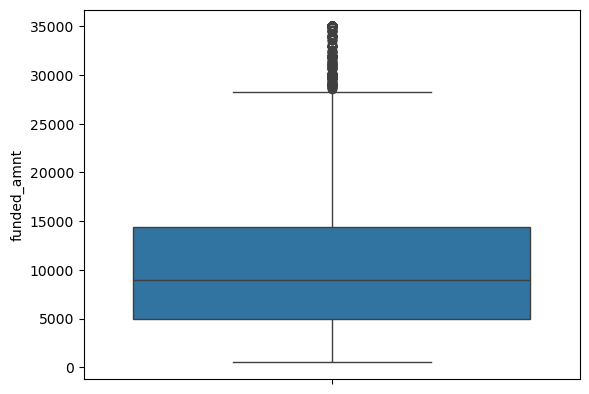

In [64]:
# Plotting for the column: funded_amnt

sns.boxplot(df["funded_amnt"])
plt.show()

# Observations: Outliers are found. Hence treating required.

In [65]:
df["funded_amnt"].describe()

count    36654.000000
mean     10436.144077
std       6800.636737
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [66]:
# Finding the Upper Fence, to understand the maximum data points that can be considered for analysis

IQR = np.percentile(df["funded_amnt"], 75) - np.percentile(df["funded_amnt"], 25)
print("Inter Quartile Range: ", IQR)

# Upper Whisker = 1.5*IQR + Q3
UpperFence = 1.5*IQR + np.percentile(df["funded_amnt"], 75)
print("Upper Fence: ", UpperFence)

Inter Quartile Range:  9400.0
Upper Fence:  28500.0


In [67]:
# Based on the above inference, calculating Percentiles to determine the spread of data points.

print("95 Percentile: ", np.percentile(df["funded_amnt"], 95))
print("97 Percentile: ", np.percentile(df["funded_amnt"], 97))
print("98 Percentile: ", np.percentile(df["funded_amnt"], 98))
print("99 Percentile: ", np.percentile(df["funded_amnt"], 99))

95 Percentile:  25000.0
97 Percentile:  25000.0
98 Percentile:  28100.0
99 Percentile:  34000.0


In [68]:
# It can be observed that the data points beyond 99 Percentile are clearly Outliers. Hence trimming them out.

funded_amnt_below_99 = np.percentile(df["funded_amnt"], 99)

df = df[df["funded_amnt"] <= funded_amnt_below_99]

In [69]:
# Verifying the Shape of Data Frame after treating the Outliers

df.shape

# Observation : Row Count reduced from 36654 to 36291
# No. of rows removed: 363

(36291, 27)

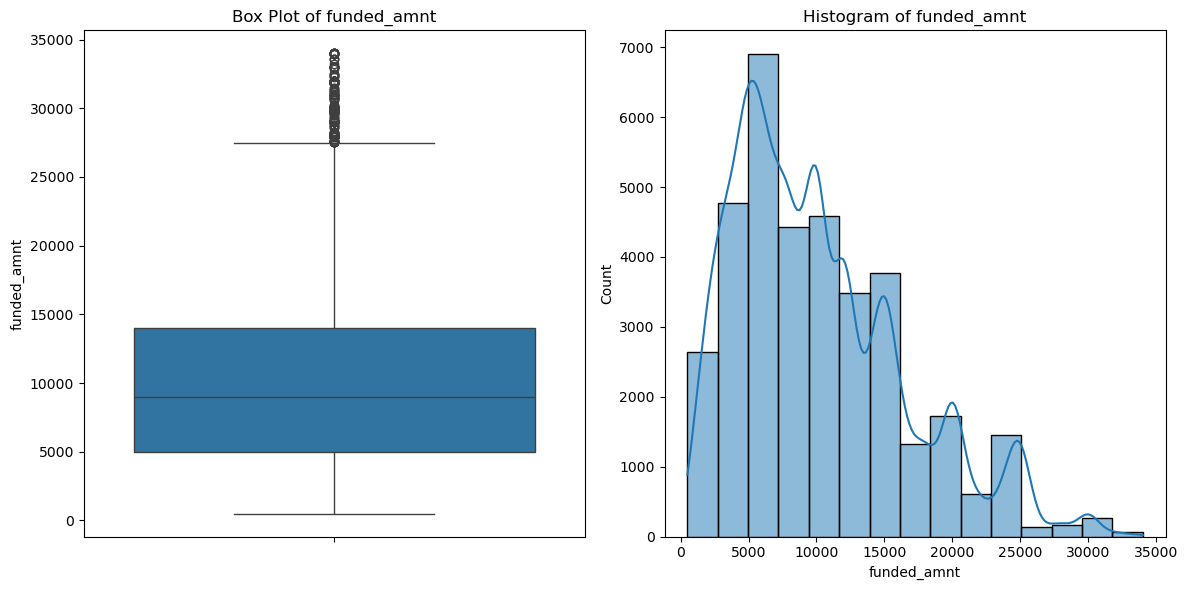

In [70]:
# Plotting for the column: funded_amnt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(df["funded_amnt"], ax=axes[0])
axes[0].set_title("Box Plot of funded_amnt")

# Histogram on the second axis
sns.histplot(df["funded_amnt"], bins=15, kde=True, ax=axes[1])
axes[1].set_title("Histogram of funded_amnt")

# Display the plots side by side
plt.tight_layout()
plt.show()

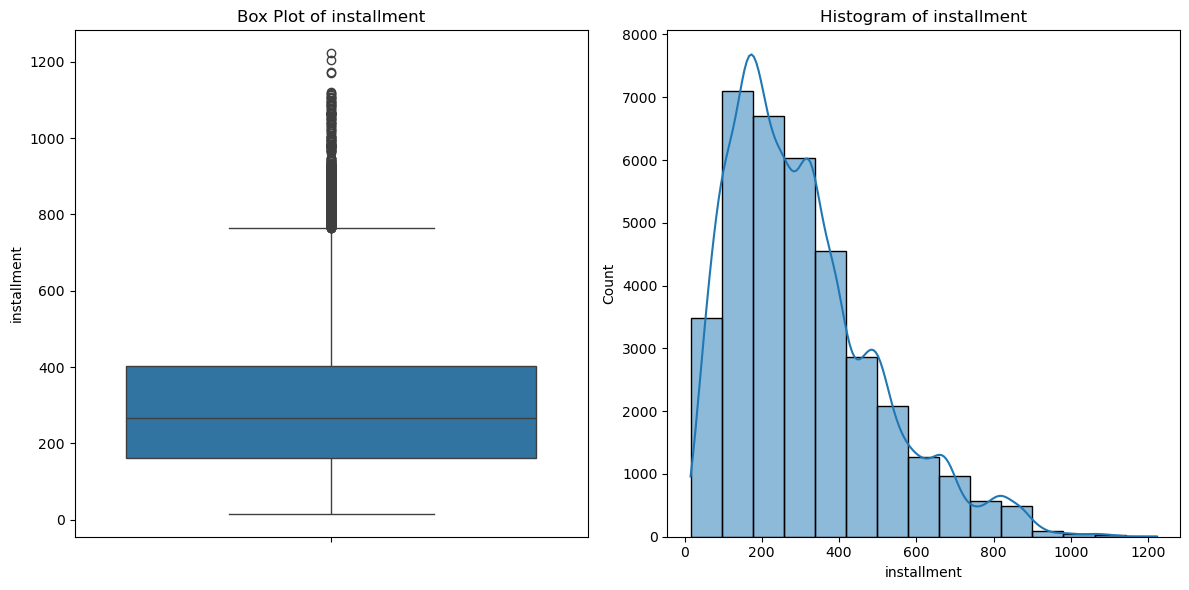

In [71]:
# Plotting box plot & Histplots for the column: installment

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(df["installment"], ax=axes[0])
axes[0].set_title("Box Plot of installment")

# Histogram on the second axis
sns.histplot(df["installment"], bins=15, kde=True, ax=axes[1])
axes[1].set_title("Histogram of installment")

# Display the plots side by side
plt.tight_layout()
plt.show()

In [72]:
df["installment"].describe()

count    36291.000000
mean       305.567712
std        189.306812
min         15.690000
25%        162.595000
50%        267.740000
75%        403.420000
max       1222.030000
Name: installment, dtype: float64

#### Observation: 
##### We cannot remove Outliers for Installment column

#### Reason:
##### We are using this column for analyzing the Outlier information to detect the people with high installments and if the reasons behind it are genuine.

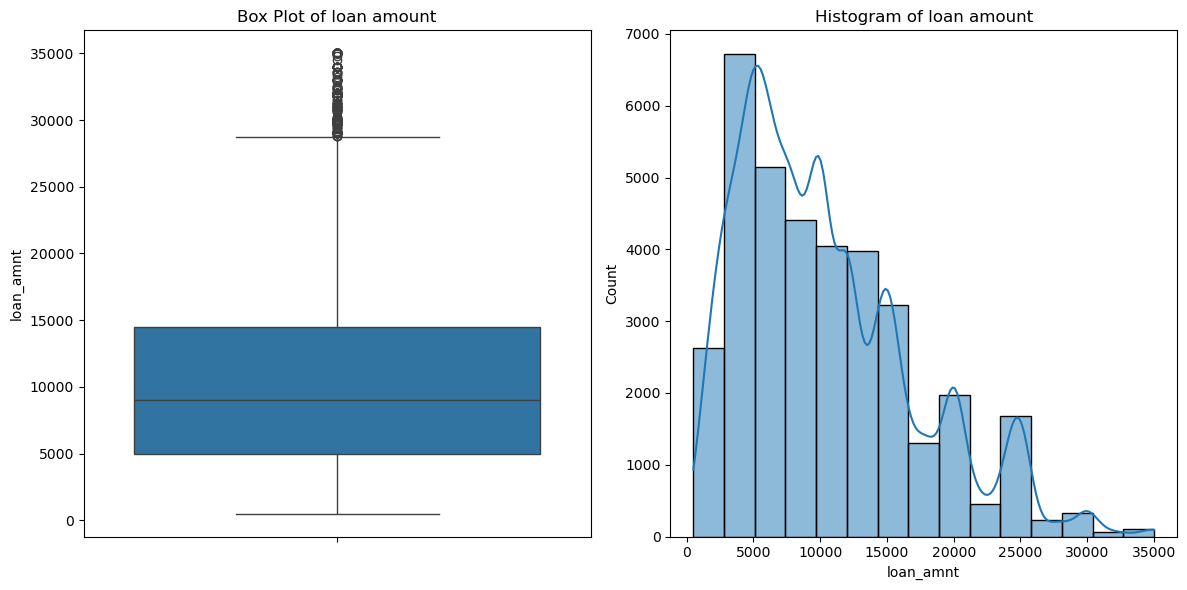

In [74]:
# Plotting box plot for column: loan_amnt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(df["loan_amnt"], ax=axes[0])
axes[0].set_title("Box Plot of loan amount")

# Histogram on the second axis
sns.histplot(df["loan_amnt"], bins=15, kde=True, ax=axes[1])
axes[1].set_title("Histogram of loan amount")

# Display the plots side by side
plt.tight_layout()
plt.show()

# Observation: Already considerable Outlier treatment is done, when treated for column: funded_amnt

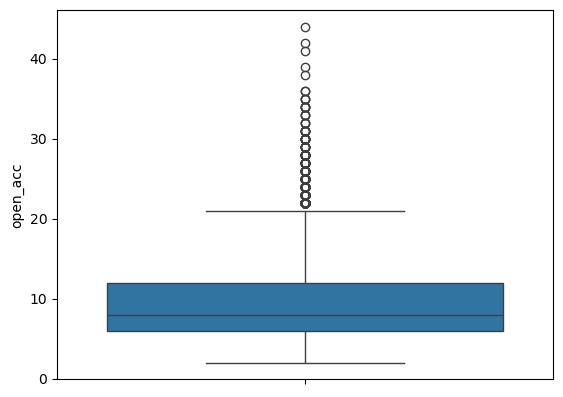

In [75]:
# Plotting box plot for column: open_acc

sns.boxplot(df["open_acc"])
plt.show()

In [76]:
df["open_acc"].describe()

count    36291.000000
mean         9.150616
std          4.350321
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [77]:
# Finding the Upper Fence, to understand the maximum data points that can be considered for analysis

IQR = np.percentile(df["open_acc"], 75) - np.percentile(df["open_acc"], 25)
print("Inter Quartile Range: ", IQR)

# Upper Whisker = 1.5*IQR + Q3
UpperFence = 1.5*IQR + np.percentile(df["open_acc"], 75)
print("Upper Fence: ", UpperFence)

Inter Quartile Range:  6.0
Upper Fence:  21.0


In [78]:
# Based on the above inference, calculating Percentiles to determine the spread of data points.

print("95 Percentile: ", np.percentile(df["open_acc"], 95))
print("97 Percentile: ", np.percentile(df["open_acc"], 97))
print("98 Percentile: ", np.percentile(df["open_acc"], 98))
print("98.5 Percentile: ", np.percentile(df["open_acc"], 98.5))
print("99 Percentile: ", np.percentile(df["open_acc"], 99))

95 Percentile:  17.0
97 Percentile:  19.0
98 Percentile:  20.0
98.5 Percentile:  21.0
99 Percentile:  22.0


In [79]:
# It can be observed that the data points beyond 99 Percentile are clearly Outliers. Hence trimming them out.

open_acc_below_99 = np.percentile(df["open_acc"], 99)

df = df[df["open_acc"] <= open_acc_below_99]

In [80]:
# Verifying the Shape of Data Frame after treating the Outliers

df.shape

# Observation : Row Count reduced from 36291 to 35983
# No. of rows removed: 308

(35983, 27)

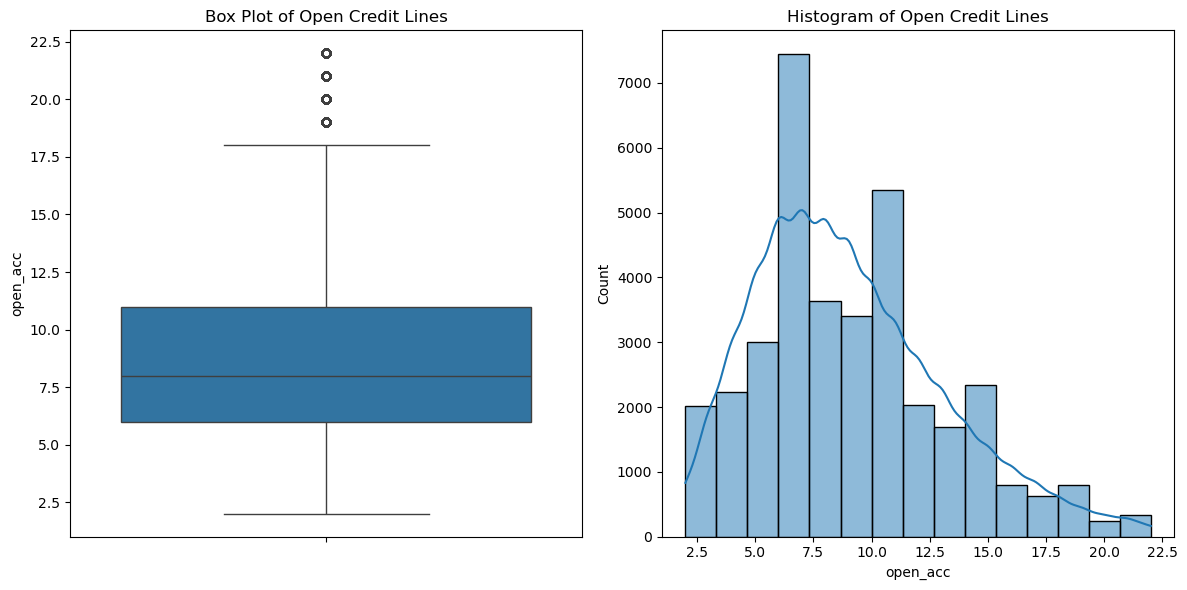

In [81]:
# Plotting box plot for column: open_acc - After treating Outliers

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(df["open_acc"], ax=axes[0])
axes[0].set_title("Box Plot of Open Credit Lines")

# Histogram on the second axis
sns.histplot(df["open_acc"], bins=15, kde=True, ax=axes[1])
axes[1].set_title("Histogram of Open Credit Lines")

# Display the plots side by side
plt.tight_layout()
plt.show()

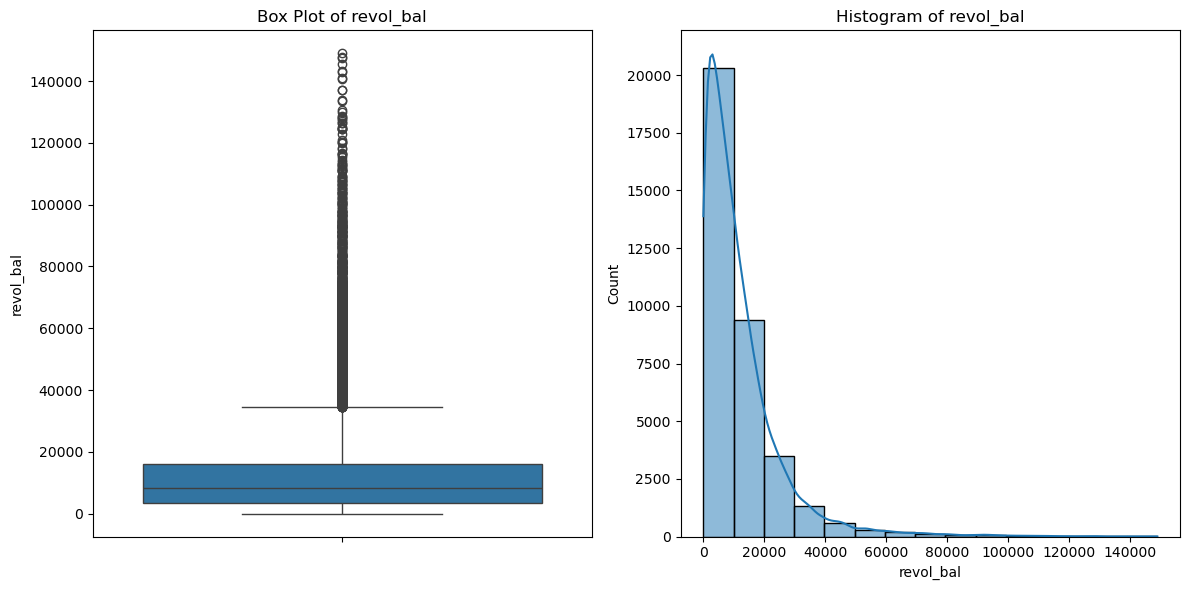

In [82]:
# Plotting box plot for column: revol_bal

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(df["revol_bal"], ax=axes[0])
axes[0].set_title("Box Plot of revol_bal")

# Histogram on the second axis
sns.histplot(df["revol_bal"], bins=15, kde=True, ax=axes[1])
axes[1].set_title("Histogram of revol_bal")

# Display the plots side by side
plt.tight_layout()
plt.show()

# Observation: Already considerable Outlier treatment is done, when treated for column: open_acc
# revol_bal High = Good Credit Score ~ Less Utilization of available Credit ~ Likely to have financial Stability ~ Unlikely to default.
# So, no treatment required.

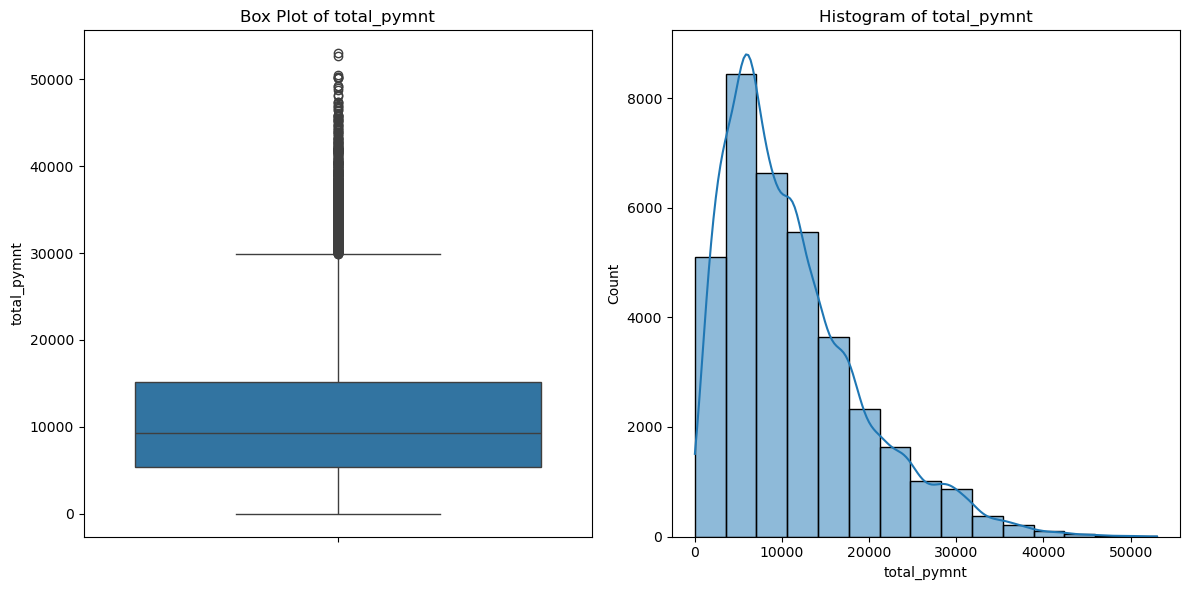

In [83]:
# Plotting box plot for column: total_pymnt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(df["total_pymnt"], ax=axes[0])
axes[0].set_title("Box Plot of total_pymnt")

# Histogram on the second axis
sns.histplot(df["total_pymnt"], bins=15, kde=True, ax=axes[1])
axes[1].set_title("Histogram of total_pymnt")

# Display the plots side by side
plt.tight_layout()
plt.show()

# Observation: Let's use this for Bi-variate Analysis of Payment funded vs Payment received. let's not remove any Outliers.

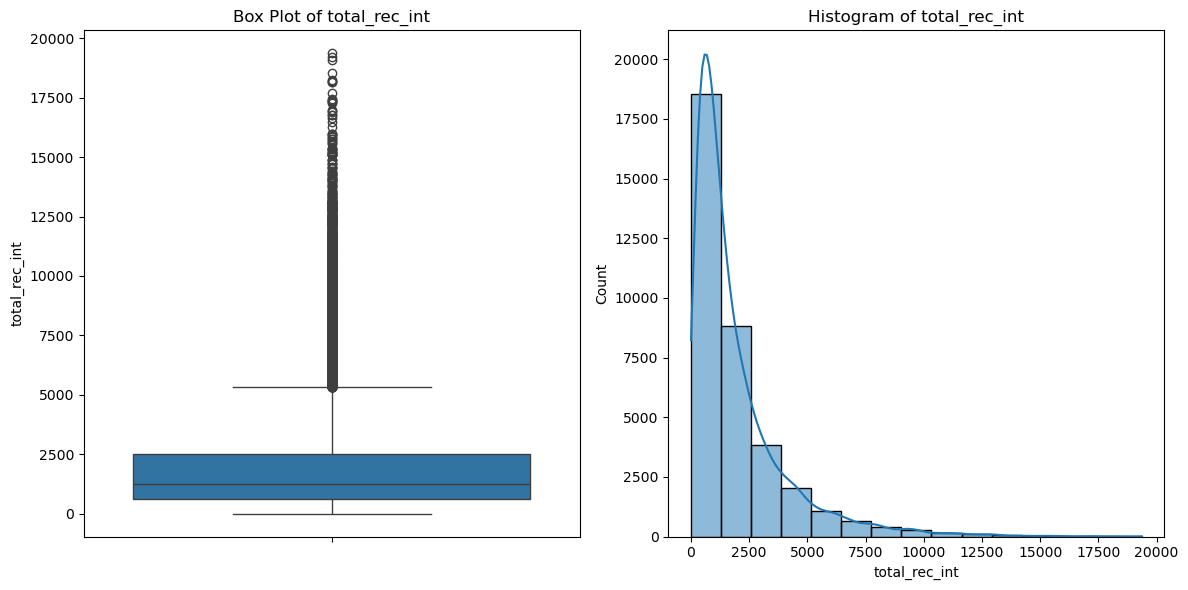

In [84]:
# Plotting box plot for column: total_rec_int

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(df["total_rec_int"], ax=axes[0])
axes[0].set_title("Box Plot of total_rec_int")

# Histogram on the second axis
sns.histplot(df["total_rec_int"], bins=15, kde=True, ax=axes[1])
axes[1].set_title("Histogram of total_rec_int")

# Display the plots side by side
plt.tight_layout()
plt.show()
# Observation: Let's use this for Bi-variate Analysis of Payment funded vs Payment received. let's not remove any Outliers.

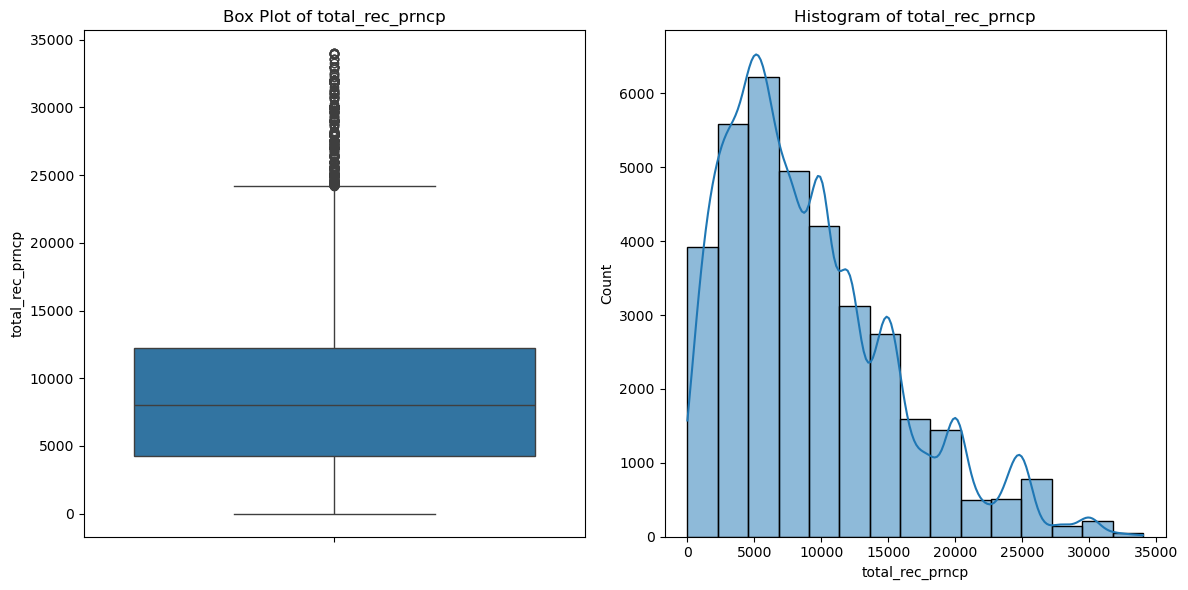

In [85]:
# Plotting box plot for column: total_rec_prncp

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(df["total_rec_prncp"], ax=axes[0])
axes[0].set_title("Box Plot of total_rec_prncp")

# Histogram on the second axis
sns.histplot(df["total_rec_prncp"], bins=15, kde=True, ax=axes[1])
axes[1].set_title("Histogram of total_rec_prncp")

# Display the plots side by side
plt.tight_layout()
plt.show()

# Observation: Let's use this for Bi-variate Analysis of Payment funded vs Payment received. let's not remove any Outliers.

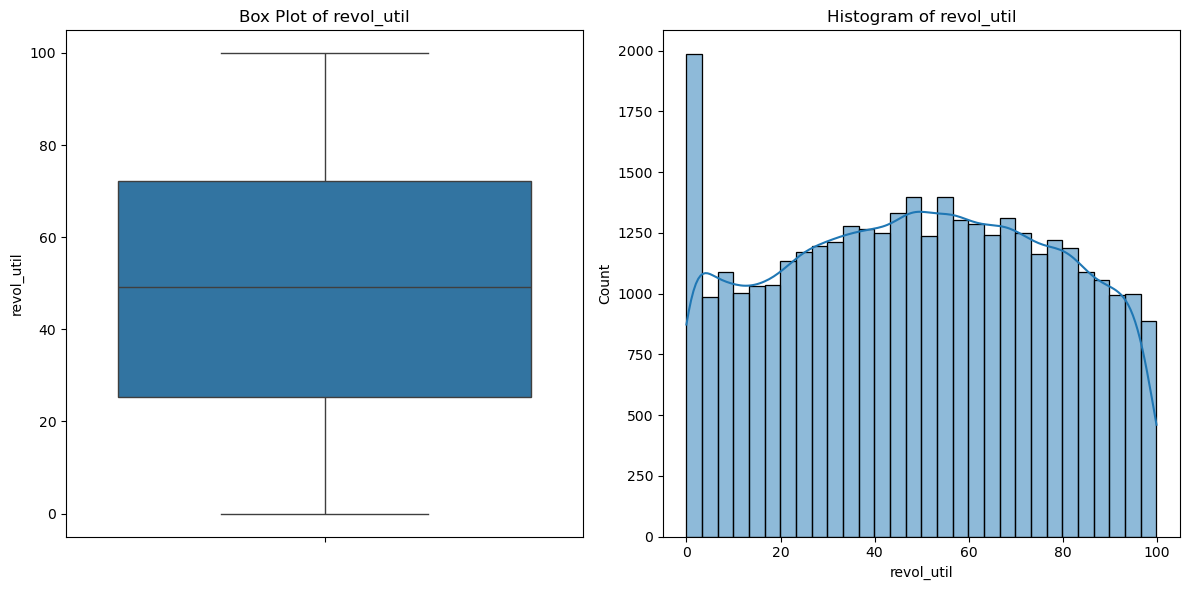

In [86]:
# Plotting box plot for column: revol_util

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(df["revol_util"], ax=axes[0])
axes[0].set_title("Box Plot of revol_util")

# Histogram on the second axis
sns.histplot(df["revol_util"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Histogram of revol_util")

# Display the plots side by side
plt.tight_layout()
plt.show()

# Observation: No Outliers found to remove.

## Univariate Analysis - Categorical Columns:

#### Categorical Columns - Identified

- id
- addr_state
- earliest_cr_line
- emp_length
- grade
- home_ownership
- inq_last_6mths
- int_rate
- issue_d
- loan_status
- purpose
- sub_grade
- term
- total_acc
- verification_status


In [89]:
# Filtering out specific categorical columns to plot using count plot to understand the value counts across each category

filtered_catCols = ['addr_state', 'earliest_cr_line', 'emp_length','grade', 'home_ownership',
                    'loan_status', 'purpose','sub_grade', 'term','verification_status']

### Plotting count plots for Categorical columns

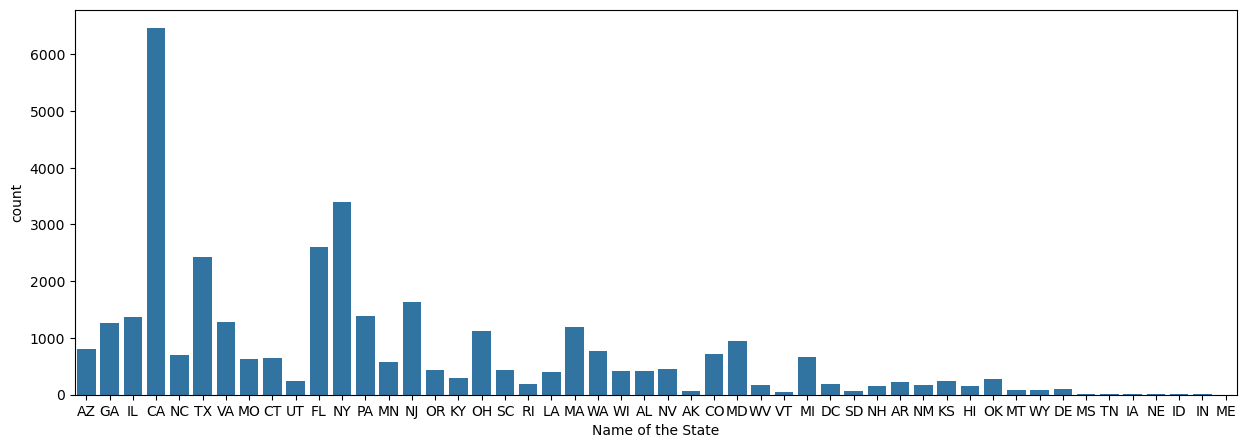

In [91]:
# Plot the count plot for 'addr_state'

plt.figure(figsize=(15,5))
sns.countplot(x='addr_state', data=df)
plt.xlabel("Name of the State")
plt.show()

In [92]:
# Determing the Counts of Borrowers across each state using Value_Counts function

df['addr_state'].value_counts()

# Observation - Majority of the Borrowers are from the state named 'CA'

addr_state
CA    6462
NY    3402
FL    2608
TX    2424
NJ    1629
PA    1393
IL    1371
VA    1276
GA    1262
MA    1197
OH    1122
MD     949
AZ     800
WA     771
CO     725
NC     701
MI     666
CT     654
MO     635
MN     579
NV     449
SC     436
OR     427
WI     417
AL     413
LA     394
KY     300
OK     277
KS     240
UT     236
AR     227
DC     191
RI     182
NM     176
WV     165
HI     159
NH     153
DE     109
MT      82
WY      78
AK      69
SD      62
VT      52
MS      19
TN      17
IN       9
IA       5
NE       5
ID       5
ME       3
Name: count, dtype: int64

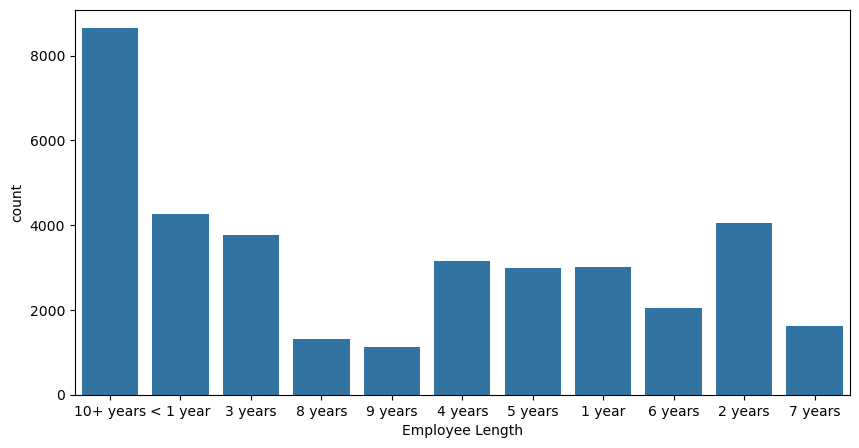

In [93]:
# Plot the count plot for 'emp_length'

plt.figure(figsize=(10,5))
sns.countplot(x='emp_length', data=df)
plt.xlabel("Employee Length")
plt.show()

In [94]:
# Determing the Counts of Borrowers across each Employee Length using Value_Counts function

df['emp_length'].value_counts()

# Observation - Majority of the Borrowers have Employee Length greater than 10+ Years

emp_length
10+ years    8651
< 1 year     4265
2 years      4050
3 years      3773
4 years      3148
1 year       3003
5 years      2984
6 years      2053
7 years      1610
8 years      1309
9 years      1137
Name: count, dtype: int64

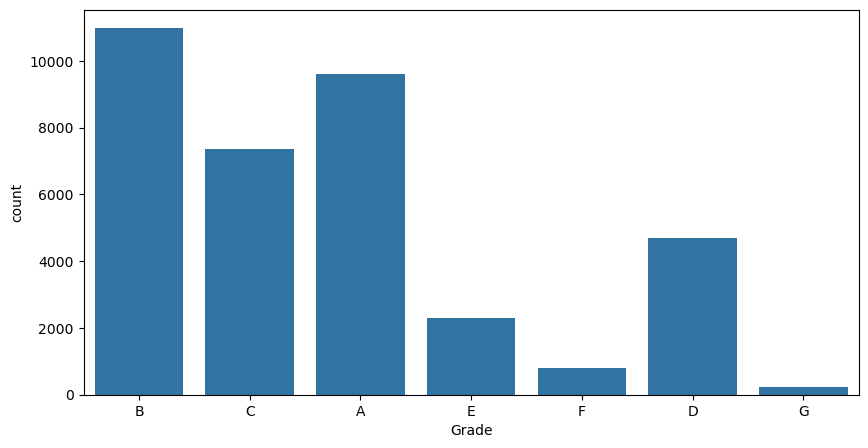

In [95]:
# Plot the count plot for 'grade'

plt.figure(figsize=(10,5))
sns.countplot(x='grade', data=df)
plt.xlabel("Grade")
plt.show()

### Plot barplot for Grade columns

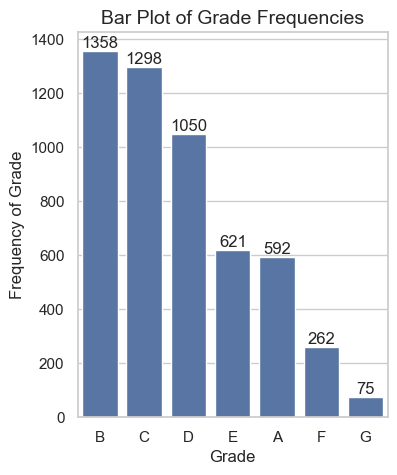

In [368]:
# Set the style
sns.set(style="whitegrid")

# Calculate the frequency counts of each grade
grade_counts = chargedOff_df['grade'].value_counts().reset_index()
grade_counts.columns = ['grade', 'frequency']  # Rename columns for clarity

# Create the bar plot
plt.figure(figsize=(4, 5))
sns.barplot(data=grade_counts, x='grade', y='frequency')

# Display frequency on top of the bars with rotation
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')

# Set title and labels
plt.title('Bar Plot of Grade Frequencies', fontsize=14)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Frequency of Grade', fontsize=12)

# Show the plot
plt.show()

In [98]:
# Determing the Counts of Borrowers across each Employee Length using Value_Counts function

df['grade'].value_counts()

# Majority of the Borrowers are from Grade B followed by Grade A

grade
B    10982
A     9603
C     7366
D     4706
E     2305
F      799
G      222
Name: count, dtype: int64

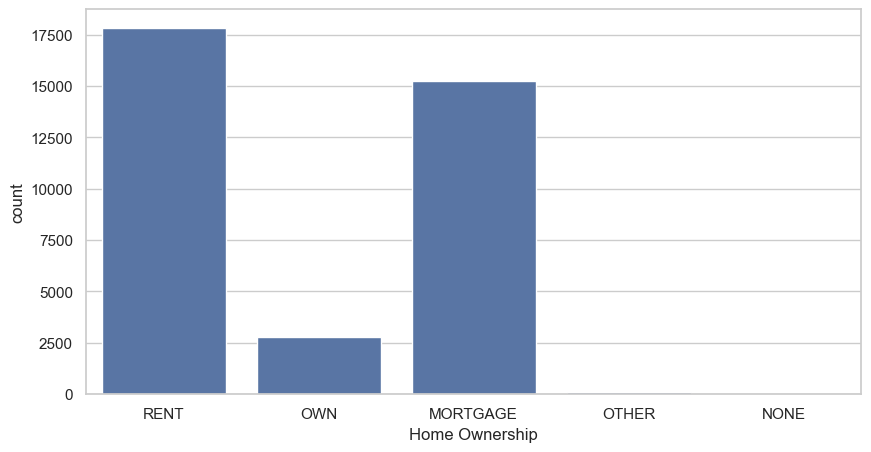

In [99]:
# Plot the count plot for 'home_ownership'

plt.figure(figsize=(10,5))
sns.countplot(x='home_ownership', data=df)
plt.xlabel("Home Ownership")
plt.show()

In [100]:
# Determing the Counts of Borrowers based on the homw ownership using Value_Counts function

df['home_ownership'].value_counts()

# Observation : Majority of Borrowers are either in Rented Or Mortgage catergory

home_ownership
RENT        17837
MORTGAGE    15255
OWN          2795
OTHER          93
NONE            3
Name: count, dtype: int64

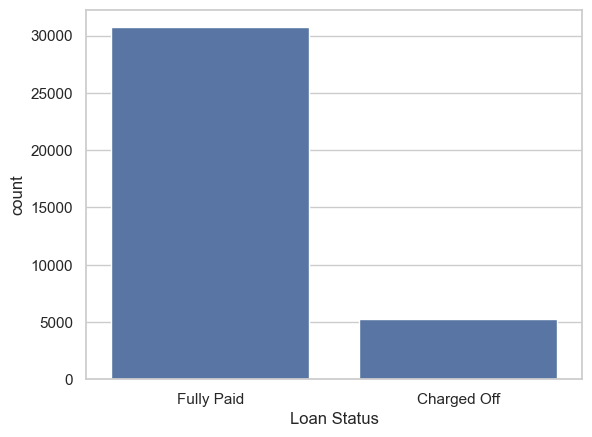

In [101]:
# Plot the count plot for 'loan_status'

sns.countplot(x='loan_status', data=df)
plt.xlabel("Loan Status")
plt.show()

In [102]:
# Determing the Counts of Borrowers based on the loan status using Value_Counts function

df['loan_status'].value_counts()

# Observation : Majority of Borrowers have fully paid

loan_status
Fully Paid     30727
Charged Off     5256
Name: count, dtype: int64

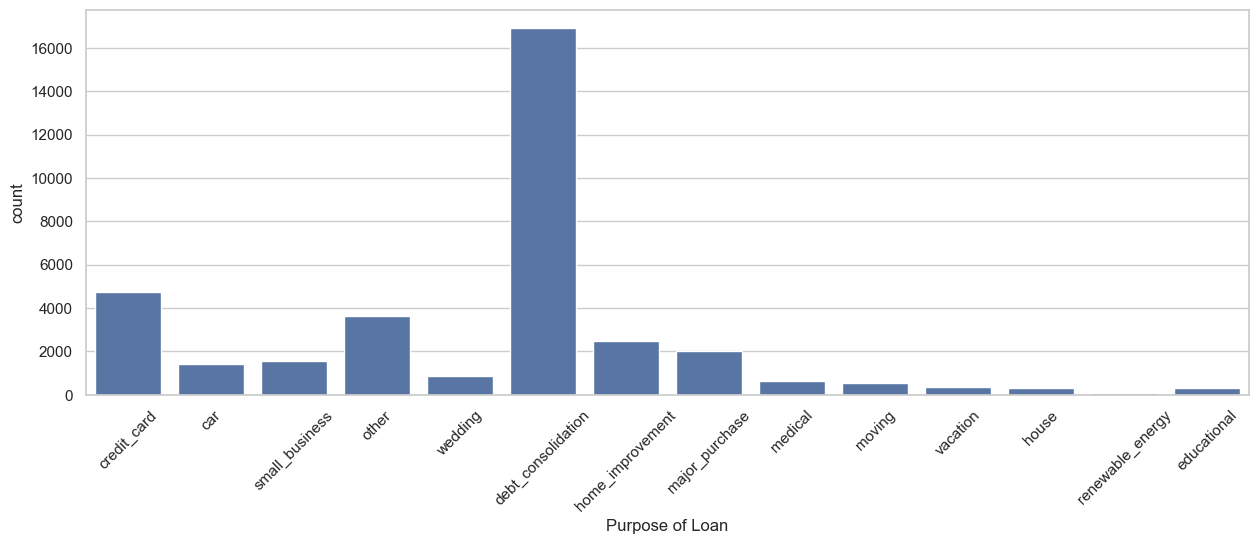

In [103]:
# Plot the count plot for 'purpose'

plt.figure(figsize=(15,5))
sns.countplot(x='purpose', data=df)
plt.xlabel("Purpose of Loan")
plt.xticks(rotation = 45)
plt.show()

In [104]:
# Determing the Counts of Borrowers based on the purpose using Value_Counts function

df['purpose'].value_counts()

# Observation : Majority of Borrowers took loan with debt consolidation as purpose

purpose
debt_consolidation    16923
credit_card            4722
other                  3651
home_improvement       2498
major_purchase         2024
small_business         1570
car                    1436
wedding                 884
medical                 632
moving                  546
vacation                362
house                   334
educational             308
renewable_energy         93
Name: count, dtype: int64

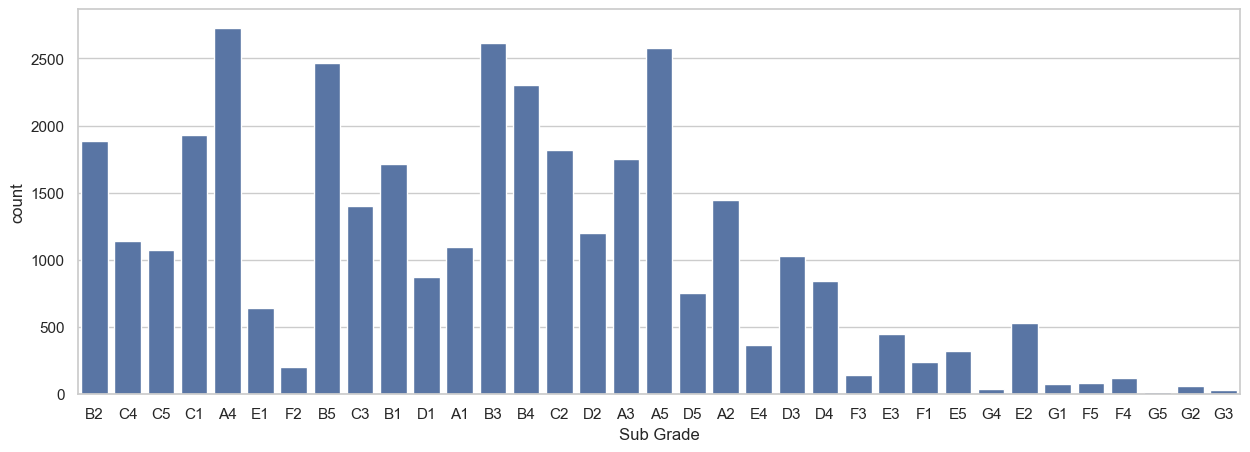

In [105]:
# Plot the count plot for 'sub_grade'

plt.figure(figsize=(15,5))
sns.countplot(x='sub_grade', data=df)
plt.xlabel("Sub Grade")
plt.show()

In [106]:
# Determing the Counts of Borrowers across each Employee Length using Value_Counts function

df['sub_grade'].value_counts()

sub_grade
A4    2730
B3    2615
A5    2578
B5    2465
B4    2306
C1    1932
B2    1884
C2    1818
A3    1748
B1    1712
A2    1449
C3    1401
D2    1200
C4    1139
A1    1098
C5    1076
D3    1027
D1     876
D4     846
D5     757
E1     642
E2     530
E3     447
E4     367
E5     319
F1     243
F2     204
F3     143
F4     123
F5      86
G1      73
G2      59
G4      37
G3      35
G5      18
Name: count, dtype: int64

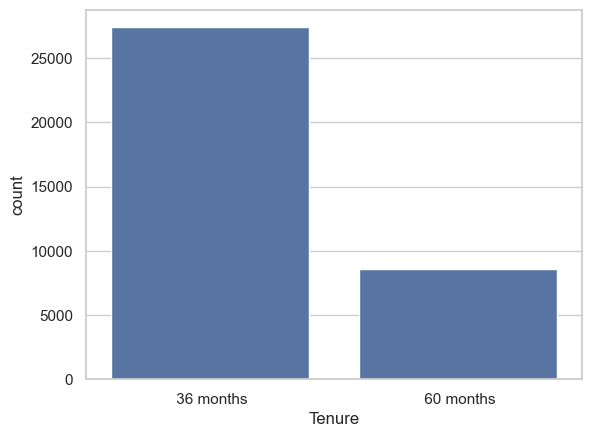

In [107]:
# Plot the count plot for 'term'

sns.countplot(x='term', data=df)
plt.xlabel("Tenure")
plt.show()

In [108]:
# Determing the Counts of Borrowers based on loan tenure using Value_Counts function

df['term'].value_counts()

# Observation : Majority of Borrowers took loan for a tenure of 36 Months

term
36 months    27394
60 months     8589
Name: count, dtype: int64

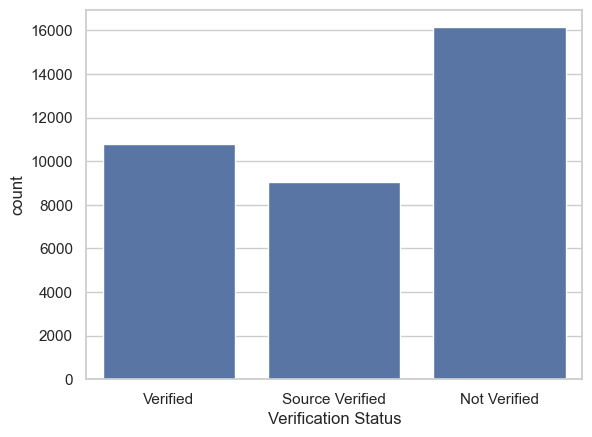

In [109]:
# Plot the count plot for 'verification_status'

sns.countplot(x='verification_status', data=df)
plt.xlabel("Verification Status")
plt.show()

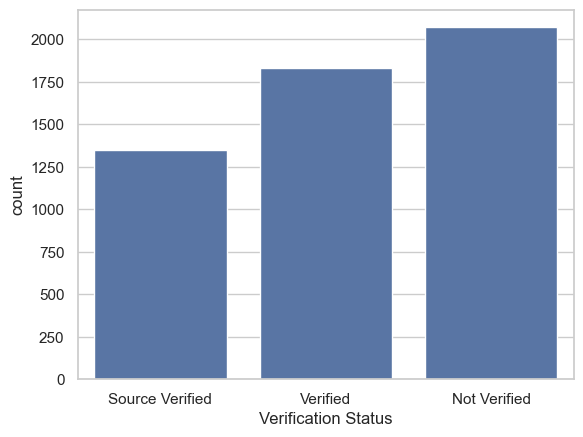

In [442]:
# Plot the count plot for 'verification_status' for ChargedOff Category

sns.countplot(x='verification_status', data=chargedOff_df)
plt.xlabel("Verification Status")
plt.show()

In [110]:
# Determing the Counts of Borrowers based on income verification status using Value_Counts function

df['verification_status'].value_counts()

# Observation : Majority of Borrowers Income status is not verified

verification_status
Not Verified       16140
Verified           10797
Source Verified     9046
Name: count, dtype: int64

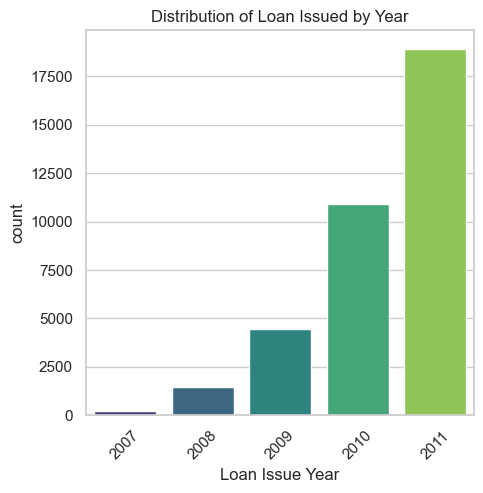

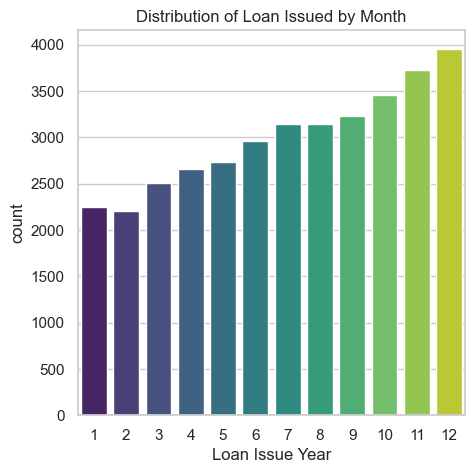

In [111]:
# Plot the Count plot 'issue_d' based on the Year and Month extracted

df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

# Extract the year from the 'issue_d' date column and cast it to integer

df['issue_year'] = df['issue_d'].dt.year

# Plot the count plot by year

plt.figure(figsize=(5, 5))
sns.countplot(x='issue_year', data=df,palette="viridis")
plt.xlabel("Loan Issue Year")
plt.xticks(rotation=45)
plt.title("Distribution of Loan Issued by Year")
plt.show()

# Extract the month from the 'issue_d' date column and cast it to integer

df['issue_month'] = df['issue_d'].dt.month

# Plot the count plot by month

plt.figure(figsize=(5, 5))
sns.countplot(x='issue_month', data=df, palette="viridis")
plt.xlabel("Loan Issue Year")
#plt.xticks(rotation=45)
plt.title("Distribution of Loan Issued by Month")
plt.show()

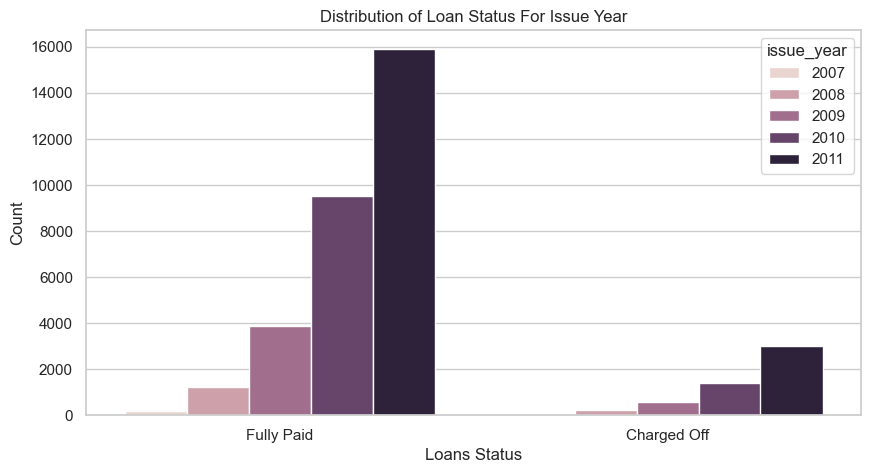

In [112]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()

In [113]:
# Determing the Counts of loans disbursed on yearly basis using Value_Counts function

df['issue_year'].value_counts()

# Observation : Majority of Loans are disbursed in the Year 2011

issue_year
2011    18932
2010    10925
2009     4436
2008     1464
2007      226
Name: count, dtype: int64

In [114]:
# Determing the Counts of loans disbursed on month basis using Value_Counts function

df['issue_month'].value_counts()

# Observation : Majority of Loans are disbursed in the month December

issue_month
12    3958
11    3725
10    3454
9     3227
8     3146
7     3146
6     2963
5     2739
4     2657
3     2511
1     2248
2     2209
Name: count, dtype: int64

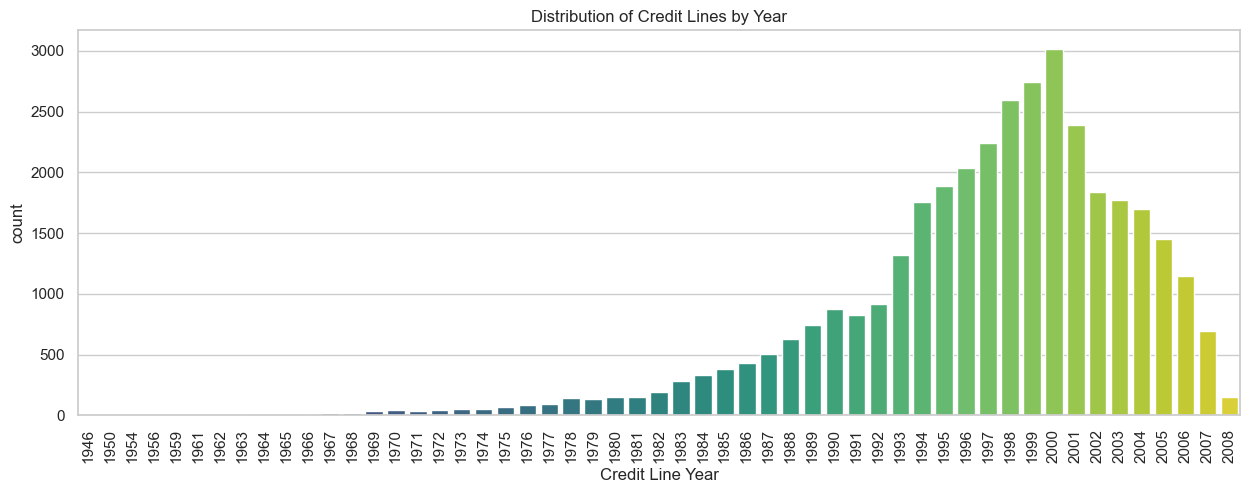

In [115]:
# Plot the Count plot 'earliest_cr_line' based on the Year extracted

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y', errors='coerce')

def fix_century(earliest_cr_line):
    if earliest_cr_line.year > 2024:  # If the year is in the future, adjust it to the 1900s
        return earliest_cr_line.replace(year=earliest_cr_line.year - 100)
    return earliest_cr_line
    
# Apply the function to adjust the century
df['earliest_cr_line'] = df['earliest_cr_line'].apply(fix_century)

# Extract the year from the 'earliest_cr_line' date column and cast it to integer

df['earliest_cr_year'] = df['earliest_cr_line'].dt.year

# Plot the count plot by year

plt.figure(figsize=(15, 5))
sns.countplot(x='earliest_cr_year', data=df, palette="viridis")
plt.xlabel("Credit Line Year")
plt.xticks(rotation=90)
plt.title("Distribution of Credit Lines by Year")
plt.show()

In [116]:
# Determing the Counts of Credit Lines opened basis year using Value_Counts function

df['earliest_cr_year'].value_counts()

# Observation : Majority of Credit Lines are opened in the year 2008

earliest_cr_year
2000    3018
1999    2746
1998    2598
2001    2386
1997    2239
1996    2033
1995    1883
2002    1834
2003    1775
1994    1754
2004    1696
2005    1452
1993    1316
2006    1148
1992     914
1990     871
1991     829
1989     743
2007     695
1988     626
1987     506
1986     433
1985     378
1984     329
1983     279
1982     189
1981     154
2008     151
1980     150
1978     144
1979     133
1977      93
1976      83
1975      70
1974      54
1973      51
1970      46
1972      42
1971      36
1969      32
1967      16
1968      16
1963      10
1966       9
1962       5
1965       5
1964       5
1954       2
1961       2
1959       1
1956       1
1946       1
1950       1
Name: count, dtype: int64

# Bi-Variate Analysis:

### Annual Income Vs Charged Off

In [119]:
# Filtering the Charged Off Data into a New Data Frame

chargedOff_df = df[df["loan_status"] == "Charged Off"]

In [120]:
# Determing the Shape of the Charged Off Data Frame

chargedOff_df.shape

# No Rows Identified - 5256 with Charged Off Category

(5256, 30)

In [121]:
# Filtering the Fully Paid Data into a New Data Frame

fullyPaid_df = df[df["loan_status"] == "Fully Paid"]

In [122]:
# Determing the Shape of the Fully Paid Data Frame

fullyPaid_df.shape

# No Rows Identified - 30727 with Fully Paid Category

(30727, 30)

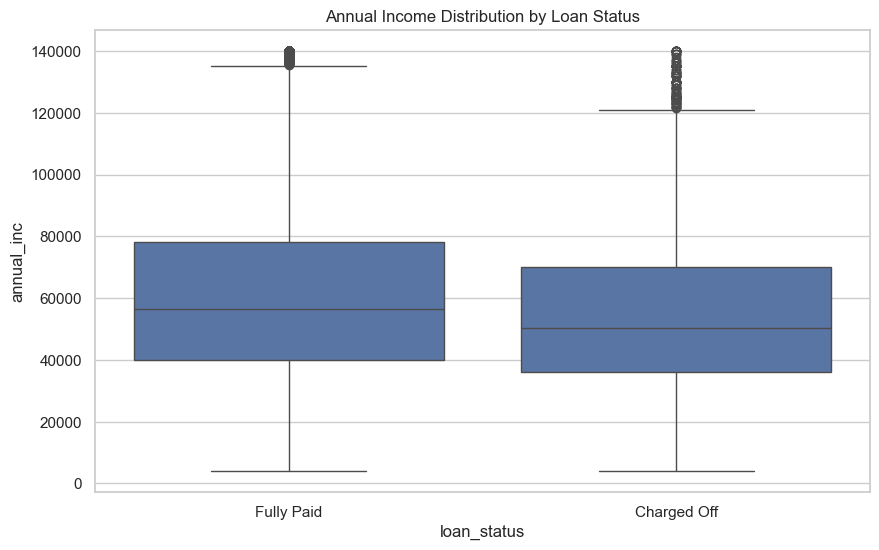

In [123]:
# Boxplot to visualize the distribution of annual_inc by loan_status

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=df)
plt.title('Annual Income Distribution by Loan Status')
plt.show()

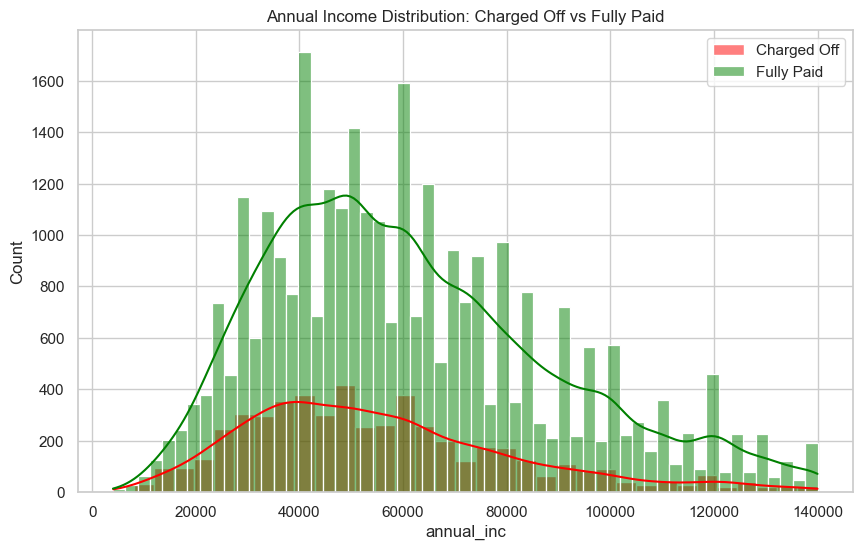

In [124]:
# Histograms for comparison

plt.figure(figsize=(10, 6))
sns.histplot(chargedOff_df['annual_inc'], color='red', label='Charged Off', kde=True)
sns.histplot(fullyPaid_df['annual_inc'], color='green', label='Fully Paid', kde=True)
plt.title('Annual Income Distribution: Charged Off vs Fully Paid')
plt.legend()
plt.show()

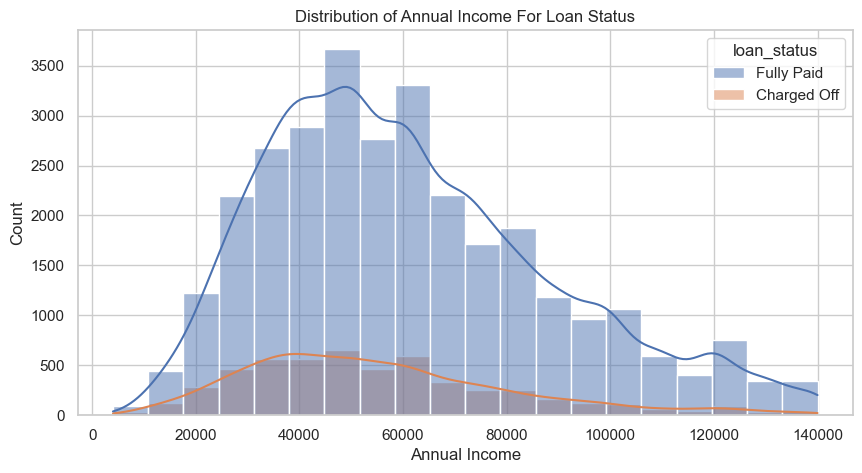

In [125]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

In [126]:
# Compare using summary statistics

chargedOff_stats = chargedOff_df['annual_inc'].describe()
fullyPaid_stats = fullyPaid_df['annual_inc'].describe()

print("Charged Off Annual Income Stats:\n", chargedOff_stats)
print("\nFully Paid Annual Income Stats:\n", fullyPaid_stats)

Charged Off Annual Income Stats:
 count      5256.000000
mean      55574.551138
std       26158.301523
min        4080.000000
25%       36000.000000
50%       50400.000000
75%       70000.000000
max      140004.000000
Name: annual_inc, dtype: float64

Fully Paid Annual Income Stats:
 count     30727.000000
mean      61222.562941
std       27716.307678
min        4000.000000
25%       40000.000000
50%       56532.000000
75%       78000.000000
max      140004.000000
Name: annual_inc, dtype: float64


# Analysis:

1. The **Fully Paid** group has an average annual income of approximately **\$61,222**.
2. The **Charged Off** group has an average annual income of approximately **\$55,574**.

- The **Fully Paid** group has a higher average annual income than the **Charged Off** group.
>
</ul>

In [128]:
# Creating Annual Income Categorization with ChargedOff Data

chargedOff_df['income_bin'] = pd.cut(chargedOff_df['annual_inc'], 
                                     bins=[0, 20000, 40000, 60000, 80000, 100000, 150000], 
                                     labels=['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100k+'], 
                                     right=False)

In [129]:
# Determing the Value Counts of Charged Off based on the Annual Income bins

chargedOff_counts = chargedOff_df.income_bin.value_counts()
chargedOff_counts

income_bin
40-60k     1608
20-40k     1365
60-80k     1145
80-100k     524
100k+       387
0-20k       227
Name: count, dtype: int64

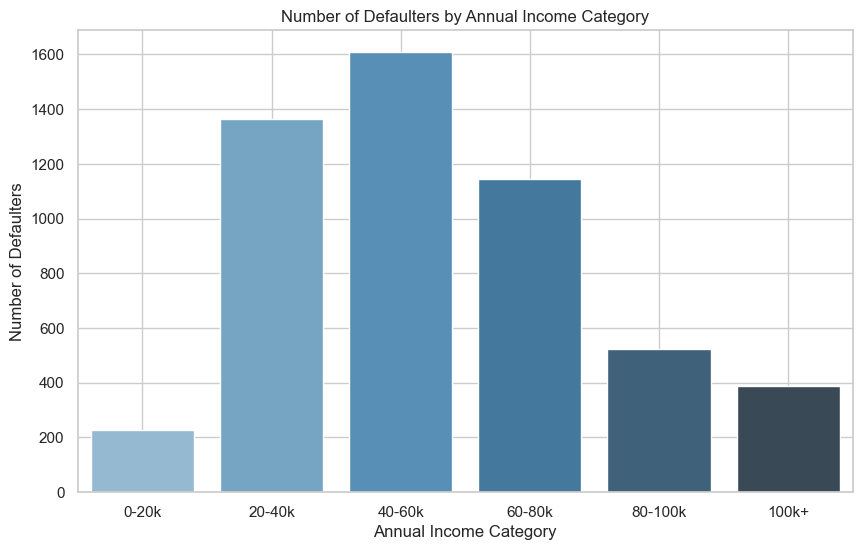

In [130]:
# Plot the number of defaulters by income category
plt.figure(figsize=(10, 6))
sns.barplot(x=chargedOff_counts.index, y=chargedOff_counts.values, palette='Blues_d')

plt.title('Number of Defaulters by Annual Income Category')
plt.xlabel('Annual Income Category')
plt.ylabel('Number of Defaulters')
plt.grid(True)

plt.show()

# Analysis of Loan Defaulters by Income Category

### Key Insights:

- **Highest Defaulters**: 
  - The income category with the highest number of defaulters is the **40k-60k** range.
<br>
- **Observation**: 
  - Starting from **40k**, as annual income **increases**, the number of defaulters **decreases** steadily. This indicates that defaulters are more concentrated in the mid-income range, but fewer in higher income categories
 <br>
- **Lowest Defaulters**: 
  - The **0-20k** income category has the **lowest number of defaulters**.

---

### Pattern Observed:

- The plot suggests a **negative relationship** between annual income and the people that are likely to default
<br>
- **Individuals with higher incomes** are **less likely to default** on their loans, while mid-income groups show higher default rates.

---

### Conclusion:

- **Income level is a significant factor** in determining the likelihood of loan default. 
- As income rises, the risk of default decreases, making higher-income individuals less risky for loan issuers.

### Interest Rate Vs Charged Off

In [133]:
# Fetching the Interest Rate values

df['int_rate'].value_counts()

int_rate
10.99%    847
7.51%     768
11.49%    749
13.49%    703
7.88%     702
         ... 
16.96%      1
16.71%      1
17.34%      1
16.01%      1
15.01%      1
Name: count, Length: 369, dtype: int64

In [134]:
# Fetching the Statistics associated to the Interest Rate from the Charged Off Data Frame

chargedOff_stats = chargedOff_df['int_rate'].describe()
print(chargedOff_stats)

count       5256
unique       321
top       11.49%
freq         121
Name: int_rate, dtype: object


In [135]:
# Cleaning and Converting data type of Interest Rate Column for easier analysis

df['int_rate'] = df['int_rate'].astype(str)
df['int_rate'] = df['int_rate'].str.replace('%', '')
df['int_rate'] = pd.to_numeric(df['int_rate'], errors='coerce')

# Re-assigning the filtered Dataframes with updated Interest Values

chargedOff_df = df[df["loan_status"] == "Charged Off"]
fullyPaid_df = df[df["loan_status"] == "Fully Paid"]

# Determining the Average Mean to understand the Interest Rate across different categories

print(f"Mean Interest Rate for All Loans: {round(df["int_rate"].mean(), 2)}%")
print(f"Mean Interest Rate for Fully Paid: {round(fullyPaid_df["int_rate"].mean(), 2)}%")
print(f"Mean Interest Rate for Charged Off: {round(chargedOff_df["int_rate"].mean(), 2)}%")

Mean Interest Rate for All Loans: 11.82%
Mean Interest Rate for Fully Paid: 11.5%
Mean Interest Rate for Charged Off: 13.65%


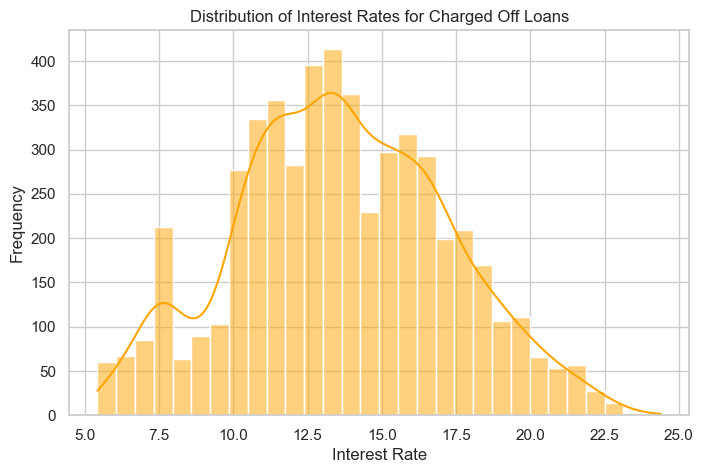

In [370]:
# Plotting the Spread of Interest Rate across Charged off Loans data

plt.figure(figsize=(8, 5))
sns.histplot(chargedOff_df['int_rate'], bins=30, kde=True, color='orange')
plt.title('Distribution of Interest Rates for Charged Off Loans')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Observation:
- The most frequent interest rate for charged-off loans is around `12.5%.` <br>
- A significant portion of borrowers with charged-off loans have interest rates between `10%` and `17.5%`, suggesting that these interest rates are particularly risky.<br>
- `Charged-off loans` are more likely to have been issued at `higher interest rates` compared to all loans on average.  
- The `distribution of interest rates` for charged-off loans is `not uniform`.  
- There might be other factors besides interest rate that contribute to loan default.

In [138]:
# Creating Interest Rate Categorization with ChargedOff Data

chargedOff_df['interest_rate_category'] = pd.cut(chargedOff_df['int_rate'], 
                                                 bins=[0, 10, 12.5, 15, 20, float('inf')], 
                                                 labels=['0 - 10', '10 - 12.5', '12.5 - 15', '15 - 20', '20+'],
                                                 right = False)

In [139]:
# Determing the Value Counts of Interest Category

chargedOff_df['interest_rate_category'].value_counts()

interest_rate_category
15 - 20      1637
12.5 - 15    1409
10 - 12.5    1207
0 - 10        781
20+           222
Name: count, dtype: int64

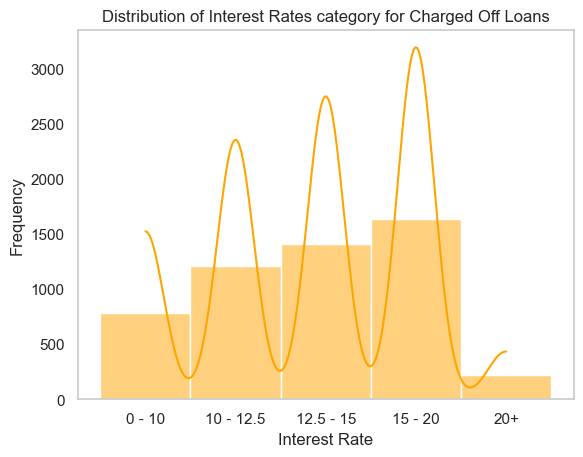

In [382]:
# Plotting Interest Rate Categories across Charged off Loans data

sns.histplot(chargedOff_df['interest_rate_category'], bins=30, kde=True, color='orange')
plt.title('Distribution of Interest Rates category for Charged Off Loans')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#### Observation:
- The highest frequency (1637) belongs to the "15 - 20" category, followed by
- "12.5 - 15" (1409),
- "10 - 12.5" (1207), 
- "0 - 10" (781), and
- "20+" (222).

#### This indicates that a significant portion of charged-off loans fall within the medium-to-high interest rate ranges (10% and above).
#### There are defaulters in 0-10 range as well, indicating that there are other factors beyond just the interest rates.

### Plotting Catplot between interest rate and Loan Amount Groups

<Figure size 640x480 with 0 Axes>

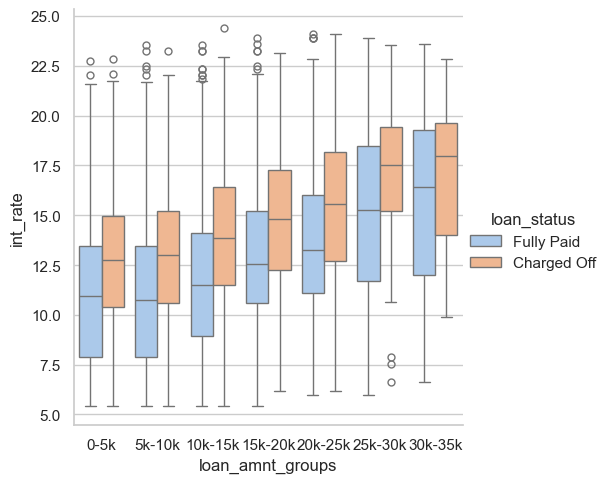

In [376]:
df['loan_amnt_groups'] = pd.cut(df['loan_amnt'], 
                                       bins=7,
                                       precision =0,
                                       labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

plt.tight_layout()
sns.catplot(data =df,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')
plt.show()

### The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups. 
- This can be a pretty strong driving factor for loan defaulting.

## Purpose vs Charged Off

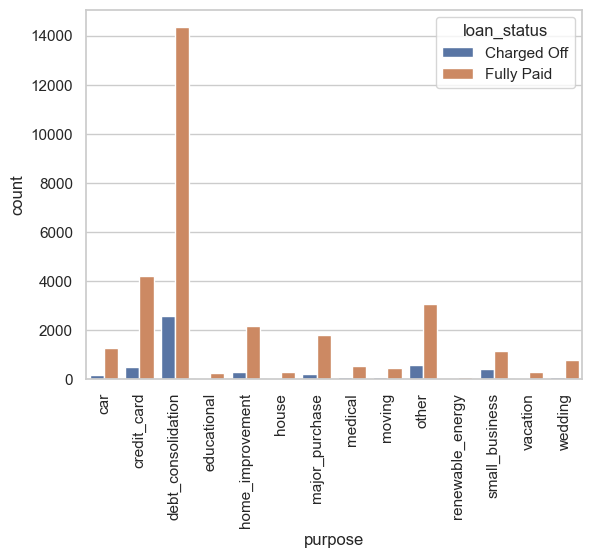

In [147]:
# Group by 'purpose' and 'loan_status', and get the count of each combination

purpose_df = df.groupby(['purpose', 'loan_status']).size().reset_index(name='count')

# Plot using hue for loan_status to differentiate categories

sns.barplot(x='purpose', y='count', hue='loan_status', data=purpose_df)
plt.xticks(rotation=90)
plt.show()

#### Observation - Majority of Loans are Provided for the Category 'Debt Consolidation' and noticed `more Charged Off` customers in the Same Caetgory

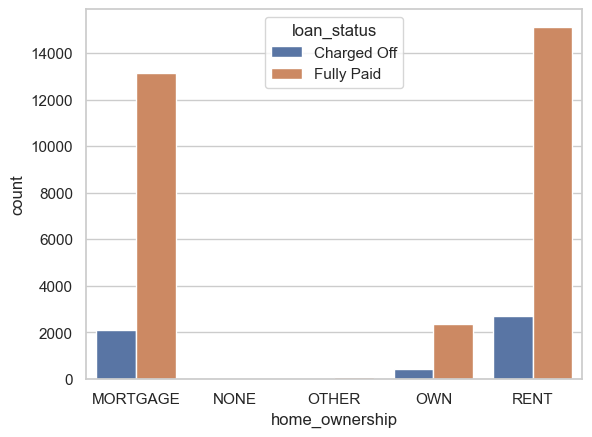

In [149]:
# Group by 'home_ownership' and 'loan_status', and get the count of each combination

HomeOwnership_df = df.groupby(['home_ownership', 'loan_status']).size().reset_index(name='count')

total_count = HomeOwnership_df['count'].sum()
HomeOwnership_df['percentage'] = (HomeOwnership_df['count'] / total_count) * 100

# Plot using hue for loan_status to differentiate categories

sns.barplot(x='home_ownership', y='count', hue='loan_status', data=HomeOwnership_df)
plt.show()

#### Observation - Majority of loans are provided to the borrowers whose home ownership status is either Rented or Mortage and same trend can be observed in Charged Off Customers

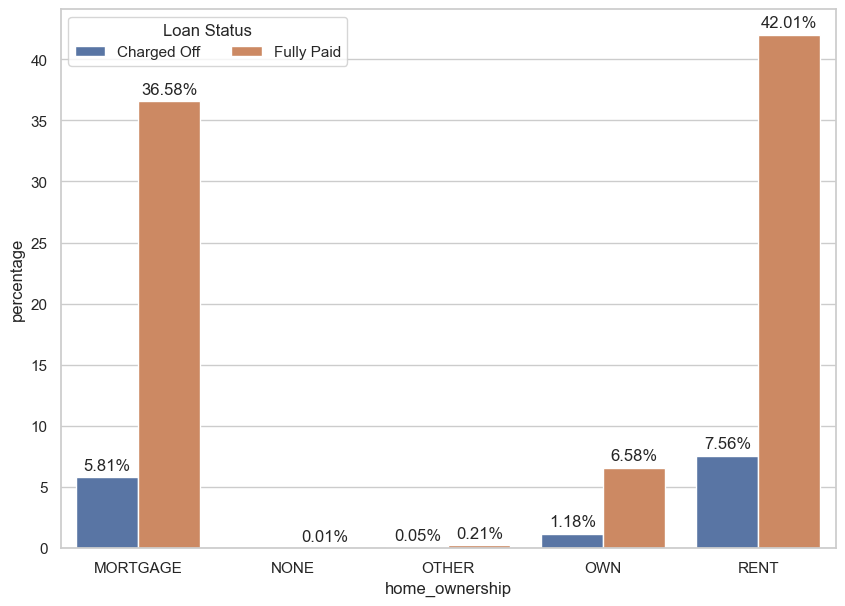

In [151]:
plt.figure(figsize = (10,7))

# Create barplot using hue for loan_status to differentiate categories
ax = sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=HomeOwnership_df)

# Annotating the bars with percentage values directly
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='edge', padding=3)

plt.legend(title='Loan Status', loc='best', ncol=3)

plt.show()

### Inference:

- Renters have the highest percentage of charged-off loans, indicating `potential financial instability` or risk factors associated with renting, followed by Mortgage category

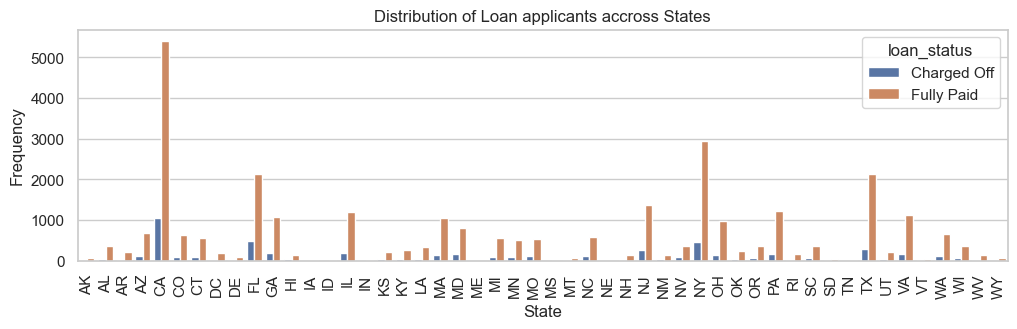

In [416]:
# Group by 'state' and 'loan_status', and get the count of each combination

State_df = df.groupby(['addr_state', 'loan_status']).size().reset_index(name='count')

# Plot using hue for loan_status to differentiate categories

plt.figure(figsize=(12, 3))
sns.barplot(x='addr_state', y='count', hue='loan_status', data=State_df)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for readability
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Distribution of Loan applicants accross States',fontsize=12)
plt.show()
plt.show()

In [154]:
# Find the state with the highest number of "Fully Paid" loans
fully_paid_max = State_df[State_df['loan_status'] == 'Fully Paid'].sort_values(by='count', ascending=False).iloc[0]

# Find the state with the highest number of "Charged Off" loans
charged_off_max = State_df[State_df['loan_status'] == 'Charged Off'].sort_values(by='count', ascending=False).iloc[0]

# Calculate percentage of Fully Paid and Charged Off loans
fully_paid_percent = (fully_paid_max['count'] / (State_df['count'].sum())) * 100
charged_off_percent = (charged_off_max['count'] / (State_df['count'].sum())) * 100

print("Fully Paid - Canada: ", round(fully_paid_percent,2))
print("Charged Off - Canada: ", round(charged_off_percent,2))

Fully Paid - Canada:  15.05
Charged Off - Canada:  2.91


In [155]:
# Find states with least and maximum Charged Off cases
least_charged_off = State_df[State_df['loan_status'] == 'Charged Off'].nsmallest(1, 'count')
max_charged_off = State_df[State_df['loan_status'] == 'Charged Off'].nlargest(1, 'count')

# Find states with least and maximum Fully Paid cases
least_fully_paid = State_df[State_df['loan_status'] == 'Fully Paid'].nsmallest(1, 'count')
max_fully_paid = State_df[State_df['loan_status'] == 'Fully Paid'].nlargest(1, 'count')

# Combine results into a summary dictionary
summary = {
    "Least Charged Off": least_charged_off[['addr_state', 'count']].to_dict(orient='records')[0],
    "Max Charged Off": max_charged_off[['addr_state', 'count']].to_dict(orient='records')[0],
    "Least Fully Paid": least_fully_paid[['addr_state', 'count']].to_dict(orient='records')[0],
    "Max Fully Paid": max_fully_paid[['addr_state', 'count']].to_dict(orient='records')[0],
}

# Display the summary
summary

{'Least Charged Off': {'addr_state': 'ID', 'count': 1},
 'Max Charged Off': {'addr_state': 'CA', 'count': 1047},
 'Least Fully Paid': {'addr_state': 'NE', 'count': 2},
 'Max Fully Paid': {'addr_state': 'CA', 'count': 5415}}

### Inference:

- **CA** has the `highest number` of both fully paid and charged-off loans, suggesting a `significant presence in the lending market`.
- **ID** has the `least number` of Charged Off and **NE** has the 'least number' of Fully Paid

- State with highest Fully Paid loans: `CA` with `5415` loans (15.05% of total)
- State with highest Charged Off loans: `CA` with `1047` loans (2.91% of total)

-  The fact that Canada also has the highest number of charged-off loans might indicate a potentially higher risk profile for borrowers in that region.

### Group by 'grade' and 'loan_status', and get the count of each combination

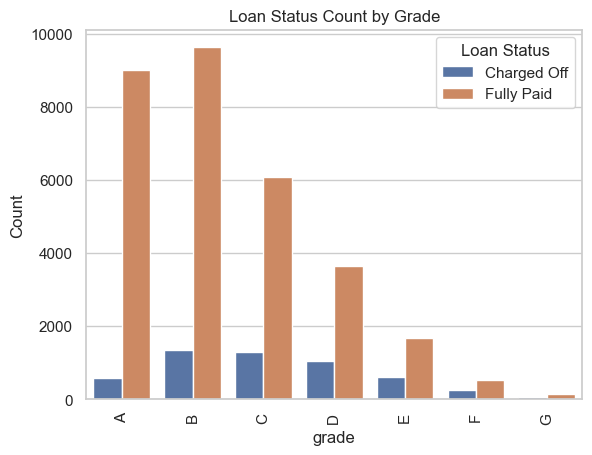

In [158]:
Grade_df = df.groupby(['grade', 'loan_status']).size().reset_index(name='count')

# Calculate the total count for each grade
total_counts = Grade_df.groupby('grade')['count'].transform('sum')

# Calculate the percentage
Grade_df['percentage'] = (Grade_df['count'] / total_counts) * 100

# Plot using hue for loan_status to differentiate categories
sns.barplot(x='grade', y='count', hue='loan_status', data=Grade_df)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Loan Status Count by Grade')
plt.legend(title='Loan Status')
plt.show()

In [159]:
print(Grade_df)

   grade  loan_status  count  percentage
0      A  Charged Off    592    6.164740
1      A   Fully Paid   9011   93.835260
2      B  Charged Off   1358   12.365689
3      B   Fully Paid   9624   87.634311
4      C  Charged Off   1298   17.621504
5      C   Fully Paid   6068   82.378496
6      D  Charged Off   1050   22.311942
7      D   Fully Paid   3656   77.688058
8      E  Charged Off    621   26.941432
9      E   Fully Paid   1684   73.058568
10     F  Charged Off    262   32.790989
11     F   Fully Paid    537   67.209011
12     G  Charged Off     75   33.783784
13     G   Fully Paid    147   66.216216


In [160]:
difference_df = Grade_df.pivot(index='grade', columns='loan_status', values='percentage')
difference_df['percentage_diff'] = difference_df['Fully Paid'] - difference_df['Charged Off']
difference_df = difference_df.reset_index()

# Display the DataFrame with grades and their percentage differences
print(difference_df[['grade', 'percentage_diff']])

loan_status grade  percentage_diff
0               A        87.670520
1               B        75.268621
2               C        64.756992
3               D        55.376116
4               E        46.117137
5               F        34.418023
6               G        32.432432


### Inference:

**Grades A and B**: 
- Loans with grades A and B (Seems to be representing lower risk borrowers) have a significantly lower percentage of charged-off loans compared to lower-grade loans.

**Grades C through G**:
- As the loan grade decreases (indicating higher risk borrowers), the proportion of charged-off loans increases, suggesting a strong correlation between creditworthiness and loan repayment.

### Group by 'verification_status' and 'loan_status', and get the count of each combination

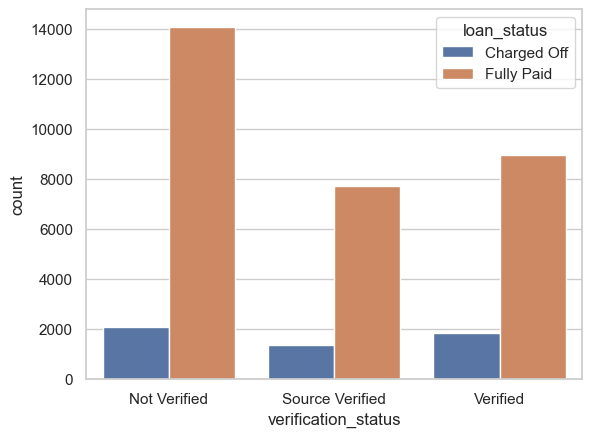

In [389]:
Ver_Status_df = df.groupby(['verification_status', 'loan_status']).size().reset_index(name='count')

# Calculate the total count for each grade
total_counts = Ver_Status_df.groupby('verification_status')['count'].transform('sum')

# Calculate the percentage
Ver_Status_df['percentage'] = (Ver_Status_df['count'] / total_counts) * 100

# Plot using hue for loan_status to differentiate categories

sns.barplot(x='verification_status', y='count', hue='loan_status', data=Ver_Status_df)
#plt.xticks(rotation=45)  # Rotate x-axis labels if needed for readability
plt.show()

In [164]:
# Checking the Output of dataframe

Ver_Status_df

verification_status  loan_status  count  percentage
0        Not Verified  Charged Off   2072   12.837670
1        Not Verified   Fully Paid  14068   87.162330
2     Source Verified  Charged Off   1352   14.945832
3     Source Verified   Fully Paid   7694   85.054168
4            Verified  Charged Off   1832   16.967676
5            Verified   Fully Paid   8965   83.032324

In [165]:
# Calculating the differences in Percentages of Fully Paid and Charged Off

difference_df = Ver_Status_df.pivot(index='verification_status', columns='loan_status', values='percentage')
difference_df['percentage_diff'] = difference_df['Fully Paid'] - difference_df['Charged Off']
difference_df = difference_df.reset_index()

# Display the DataFrame with grades and their percentage differences
print(difference_df[['verification_status', 'percentage_diff']])

loan_status verification_status  percentage_diff
0                  Not Verified        74.324659
1               Source Verified        70.108335
2                      Verified        66.064648


### Inference:

- `Not Verified` loans have the `highest percentage of Charged Off loans (around 12%)` compared to Source Verified and Verified loans.
- `Verified` loans have the `highest percentage of Fully Paid loans (around 83%)` compared to Not Verified and Source Verified loans.
- The `difference` between Fully Paid and Charged Off loan percentages is `greatest for Not Verified loans (around 74%)` and `lowest for Verified loans (around 66%)`.

#### In simpler terms, loans with some form of verification (Source Verified or Verified) tend to have a higher likelihood of being fully paid compared to loans with No Verification.

## Interest rate Vs Grade

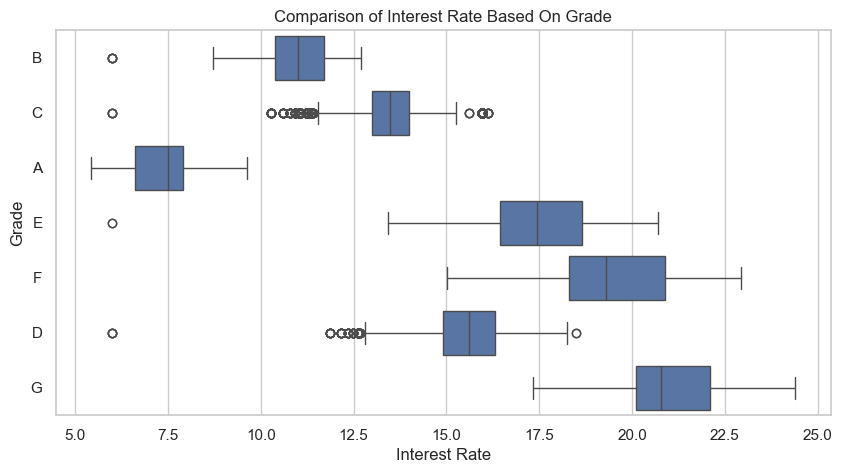

In [168]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

### **Inference:** 
The Grade represent risk factor thus we can say interst rate increases with the risk.

### Group by 'Sub Grade' and 'loan_status', and get the count of each combination

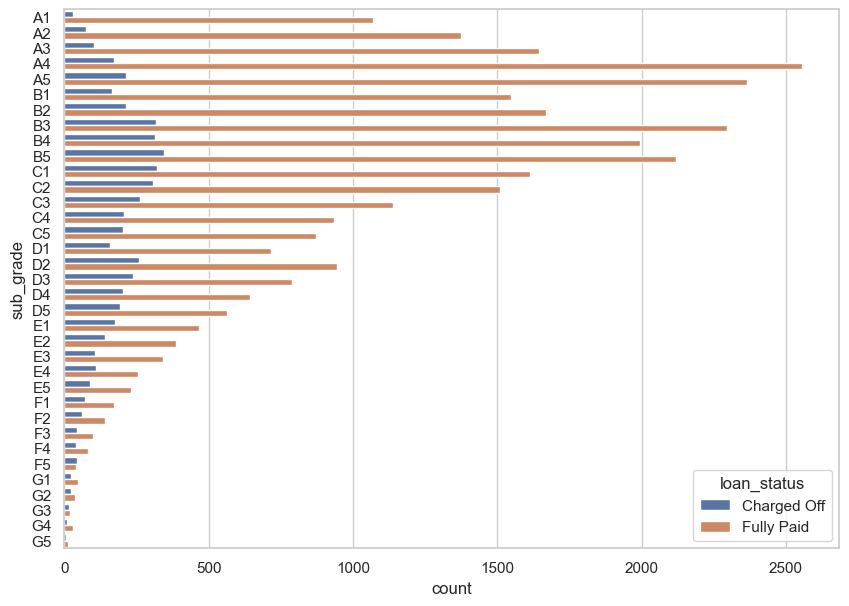

In [171]:
subgrade_df = df.groupby(['sub_grade', 'loan_status']).size().reset_index(name='count')

# Plot using hue for loan_status to differentiate categories

plt.figure(figsize=(10, 7))
sns.barplot(y='sub_grade', x='count', hue='loan_status', data=subgrade_df)
plt.show()

### Term, Verification Status Vs Loan Amount

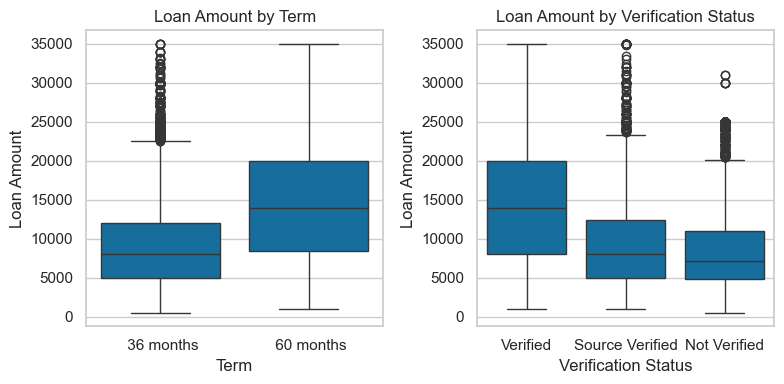

In [175]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Boxplot for 'term'
sns.boxplot(x='term', y='loan_amnt', data=df, ax=axes[0])
axes[0].set_title('Loan Amount by Term')
axes[0].set_xlabel('Term')
axes[0].set_ylabel('Loan Amount')

# Boxplot for 'verification_status'
sns.boxplot(x='verification_status', y='loan_amnt', data=df, ax=axes[1])
axes[1].set_title('Loan Amount by Verification Status')
axes[1].set_xlabel('Verification Status')
axes[1].set_ylabel('Loan Amount')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#### Observations:

`Loan Amount by Term`:
- Applicants who applied and defaulted have no significant difference in loan_amounts.
- Applicants applying for long term has applied for more loan. 

`Loan Amount by Verification Status`:
- The median loan amount for verified applicants is slightly higher than for source verified applicants, and both are higher than for not verified applicants.
- The distribution of loan amounts is similar across all verification statuses, with a similar spread and number of outliers.

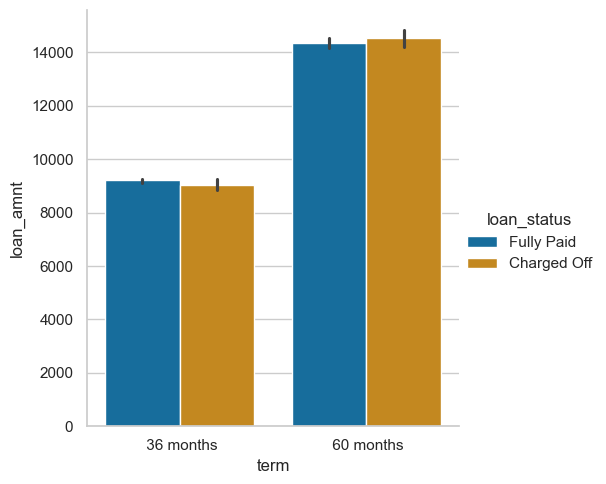

In [176]:
# Plotting Catplot among term and loan amount

sns.catplot(x = 'term', y = 'loan_amnt', data = df,hue = 'loan_status', kind = 'bar')
plt.show()

### Term Vs Grade

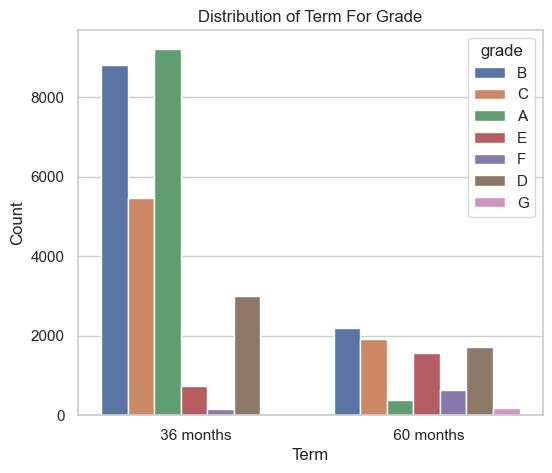

In [386]:
# Distribution of Term based on Grade
plt.figure(figsize=(6,5))
sns.countplot(data=df,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade',fontsize=12)
plt.show()

### **Inference:** 
The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.

### Loan Status, Grade Vs Loan Amount

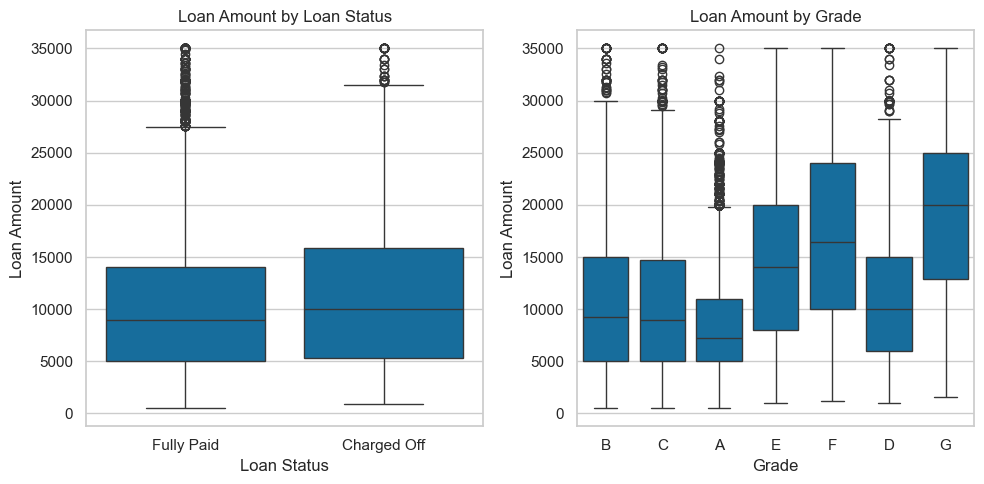

In [182]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Boxplot for 'Loan Status' vs 'Loan Amount'
sns.boxplot(x='loan_status', y='loan_amnt', data=df, ax=axes[0])
axes[0].set_title('Loan Amount by Loan Status')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Loan Amount')

# Boxplot for 'Grade Vs Loan Amount'
sns.boxplot(x='grade', y='loan_amnt', data=df, ax=axes[1])
axes[1].set_title('Loan Amount by Grade')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Loan Amount')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Observation:

- The grade of the loan has a greater impact on the loan amount than the loan status.
- `Higher grades` are associated with `higher loan amounts` and more variability in loan amounts.
- Loan status has a more minor effect on loan amount, with fully paid loans being slightly higher on average.
- Outliers are common in all groups, indicating some extreme cases in terms of loan amounts across different grades and statuses.

### Group by 'Employee Length' and 'Charged Off', and get the count of each combination

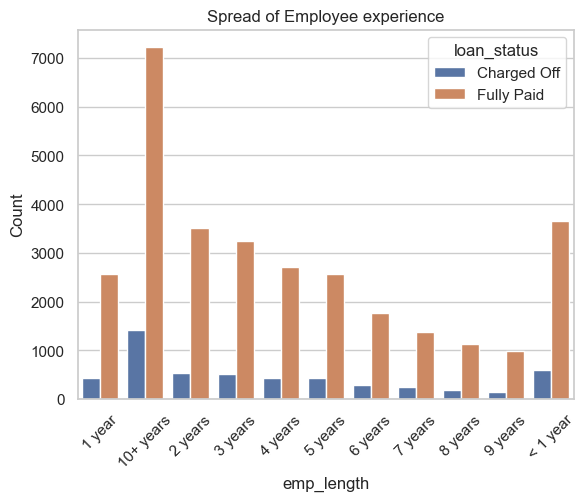

In [391]:
empLen_Status_df = df.groupby(['emp_length', 'loan_status']).size().reset_index(name='count')

# Calculate the total count for each grade
total_counts = empLen_Status_df.groupby('emp_length')['count'].transform('sum')

# Calculate the percentage
empLen_Status_df['percentage'] = (empLen_Status_df['count'] / total_counts) * 100

# Plot using hue for loan_status to differentiate categories

sns.barplot(x='emp_length', y='count', hue='loan_status', data=empLen_Status_df)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Spread of Employee experience')
plt.show()

### Inference:

`Shorter Tenure, Higher Default Rates:`
- < 1 year: Employees with less than 1 year of tenure have a significantly higher percentage of charged-off loans compared to those with longer tenures.
- 1-3 years: Borrowers with 1 to 3 years of tenure also exhibit relatively high default rates.

`Longer tenure, lower risk:` 
- As employee tenure increases, the proportion of charged-off loans generally decreases, suggesting that longer-tenured employees might be perceived as more stable and financially responsible.
  
#### Longer tenure may suggest a more stable financial situation, increasing the chances of loan repayment.

### Plotting DTI Vs ChargedOff to understand any pattern

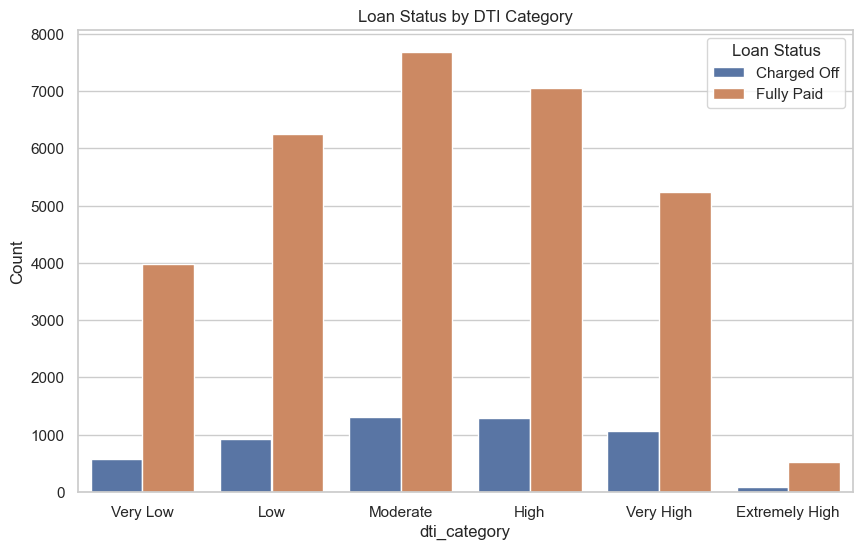

In [396]:
# Segmenting the dti values into 6 categories as below:

df['dti_category'] = pd.cut(df['dti'], 
                            bins=[0, 5, 10, 15, 20, 25, 30], 
                            labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extremely High'], 
                            right=False)

# Group by 'dti_category' and 'loan_status', and get the count of each combination
dti_Status_df = df.groupby(['dti_category', 'loan_status']).size().reset_index(name='count')

# Calculate the total count for each dti category
total_counts = dti_Status_df.groupby('dti_category')['count'].transform('sum')

# Calculate the percentage
dti_Status_df['percentage'] = (dti_Status_df['count'] / total_counts) * 100

# Plot using hue for loan_status to differentiate categories
plt.figure(figsize=(10,6))
sns.barplot(x='dti_category', y='count', hue='loan_status', data=dti_Status_df)
#plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Loan Status by DTI Category')
plt.legend(title='Loan Status')
plt.show()

In [189]:
# Verifying the filtered dataframe

dti_Status_df

dti_category  loan_status  count  percentage
0         Very Low  Charged Off    579   12.714097
1         Very Low   Fully Paid   3975   87.285903
2              Low  Charged Off    918   12.794425
3              Low   Fully Paid   6257   87.205575
4         Moderate  Charged Off   1312   14.582639
5         Moderate   Fully Paid   7685   85.417361
6             High  Charged Off   1296   15.530258
7             High   Fully Paid   7049   84.469742
8        Very High  Charged Off   1069   16.938678
9        Very High   Fully Paid   5242   83.061322
10  Extremely High  Charged Off     82   13.643927
11  Extremely High   Fully Paid    519   86.356073

In [190]:
# Display maximum values of Charged Off and Fully Paid Categories

max_counts = dti_Status_df.groupby(['loan_status','dti_category'])['count'].max().reset_index()

# Display results
print(max_counts)

    loan_status    dti_category  count
0   Charged Off        Very Low    579
1   Charged Off             Low    918
2   Charged Off        Moderate   1312
3   Charged Off            High   1296
4   Charged Off       Very High   1069
5   Charged Off  Extremely High     82
6    Fully Paid        Very Low   3975
7    Fully Paid             Low   6257
8    Fully Paid        Moderate   7685
9    Fully Paid            High   7049
10   Fully Paid       Very High   5242
11   Fully Paid  Extremely High    519


In [191]:
# Calculating the differences in Percentages of Fully Paid and Charged Off

difference_df = dti_Status_df.pivot(index='dti_category', columns='loan_status', values='count')
difference_df['percentage_diff'] = difference_df['Fully Paid'] - difference_df['Charged Off']
difference_df = difference_df.reset_index()

# Display the DataFrame with grades and their percentage differences
print(difference_df[['dti_category', 'percentage_diff']])

loan_status    dti_category  percentage_diff
0                  Very Low             3396
1                       Low             5339
2                  Moderate             6373
3                      High             5753
4                 Very High             4173
5            Extremely High              437


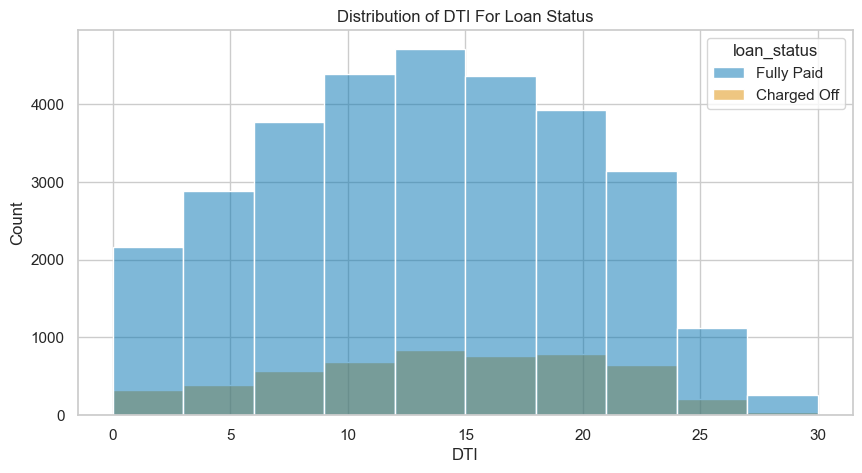

In [192]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

### Observation:

- `Moderate` Category has more number of Fully Paid and ChargedOff counts followed by `High`
- High DTI Value having High Risk of defaults
- Low DTI Values having Low Risk of defaults

### **Inference:** 
The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.

### Plotting loan Amount with Interest Rate to understand any pattern

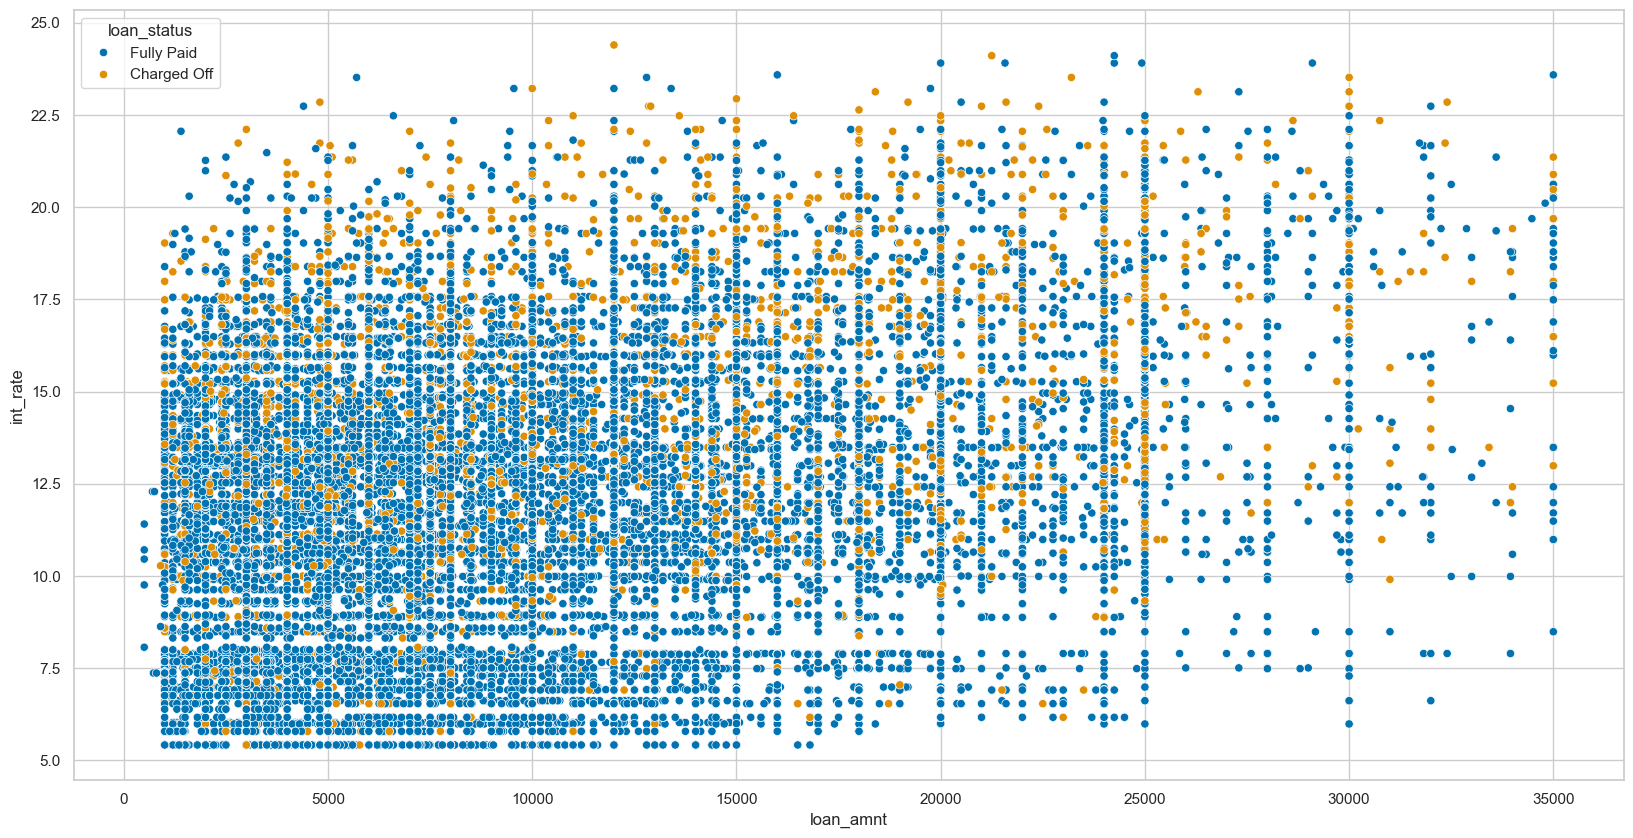

In [196]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='loan_amnt', y='int_rate', data=df, hue='loan_status')
plt.show()

# Observation : No Specific Pattern Can be Determined

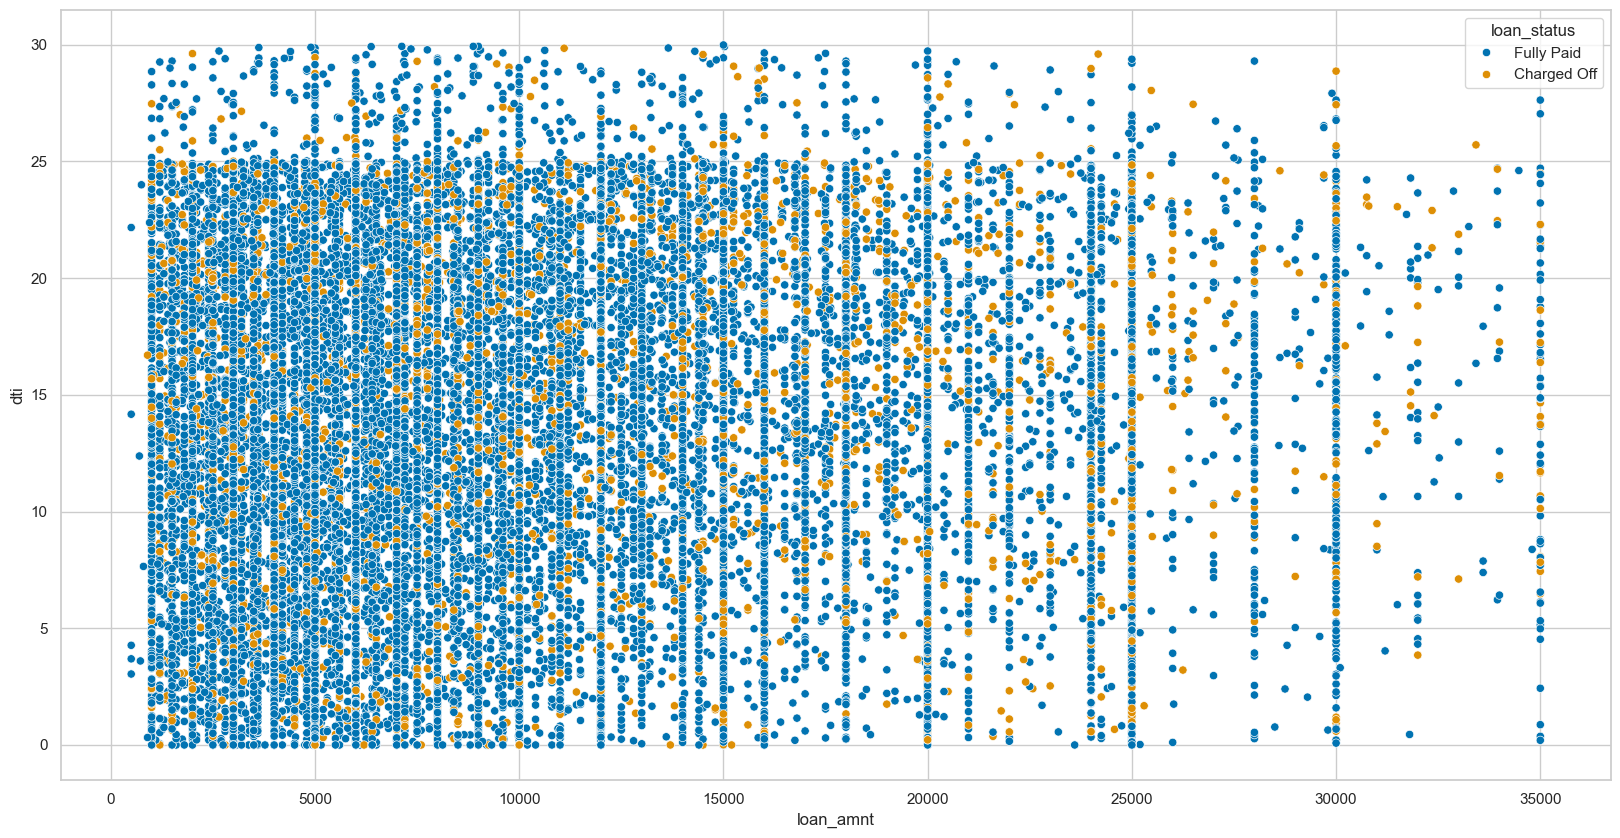

In [197]:
# Plotting loan Amount with DTI to understand any pattern

plt.figure(figsize=(20,10))
sns.scatterplot(x='loan_amnt', y='dti', data=df, hue='loan_status')
plt.show()

# Observation : No Specific Pattern Can be Determined

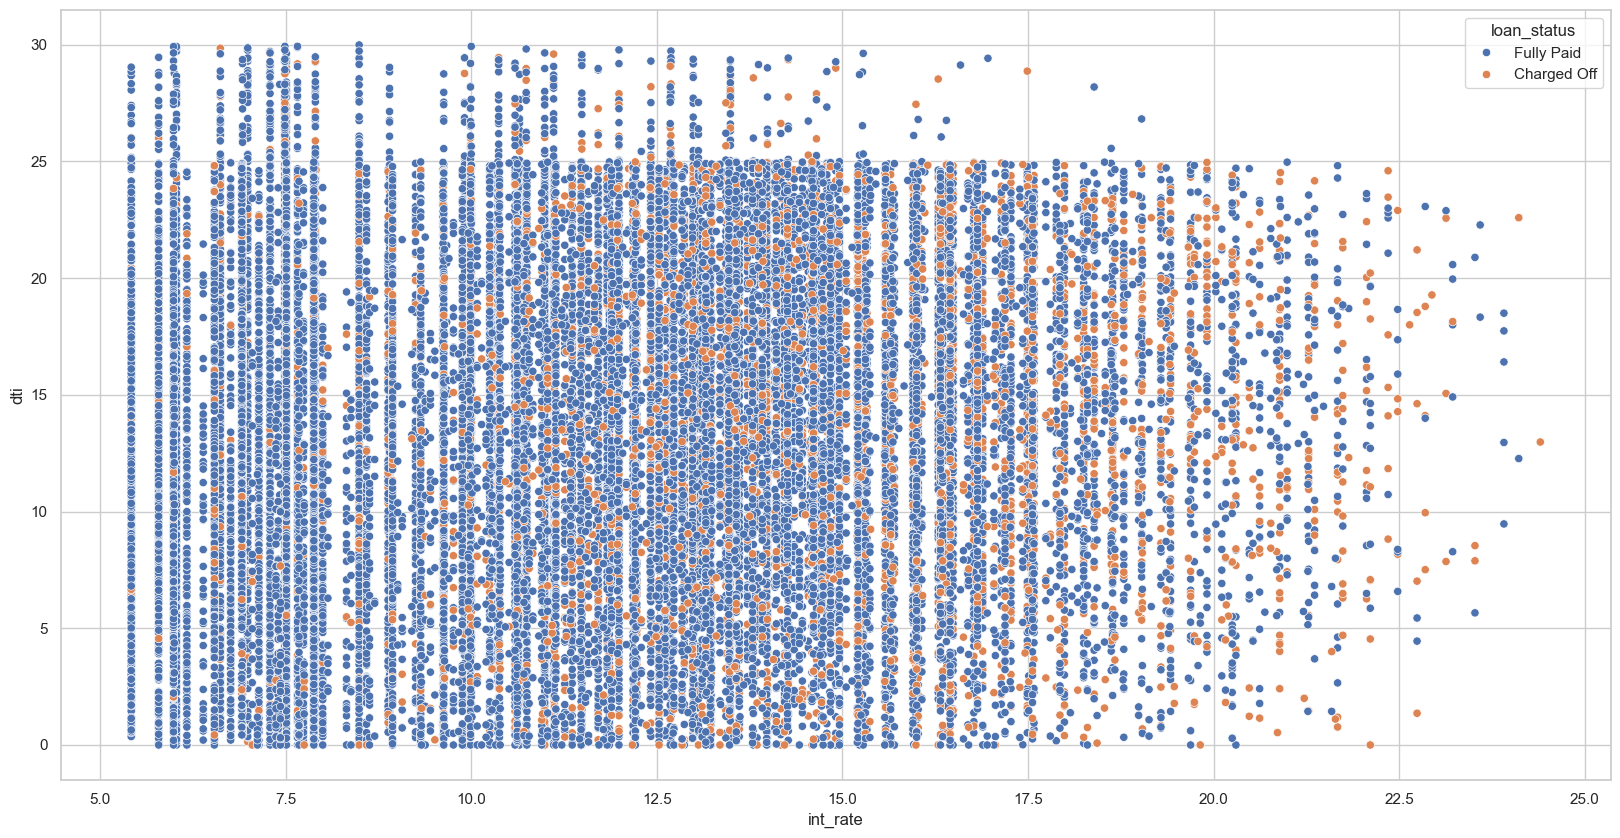

In [424]:
# Plotting Interest Rate with DTI to understand any pattern

plt.figure(figsize=(20,10))
sns.scatterplot(x='int_rate', y='dti', data=df, hue='loan_status')
plt.show()

In [199]:
# Determing the Correlation between Numerical Columns in the Charged Off Data Frame

Ch_Loan_Corr = chargedOff_df[numerical_columns].corr()
Ch_Loan_Corr

annual_inc       dti  funded_amnt  installment  loan_amnt  \
annual_inc         1.000000 -0.034944     0.429112     0.430117   0.434552   
dti               -0.034944  1.000000     0.074433     0.051311   0.079124   
funded_amnt        0.429112  0.074433     1.000000     0.948913   0.976045   
installment        0.430117  0.051311     0.948913     1.000000   0.916100   
loan_amnt          0.434552  0.079124     0.976045     0.916100   1.000000   
open_acc           0.293657  0.315804     0.176210     0.162535   0.181948   
revol_bal          0.426026  0.266790     0.284245     0.275071   0.299445   
total_pymnt        0.325884  0.049442     0.683808     0.647631   0.664134   
total_rec_int      0.304397  0.076077     0.695272     0.597214   0.682217   
total_rec_prncp    0.274727  0.020115     0.562703     0.569320   0.542534   
revol_util         0.090364  0.230453     0.048722     0.074230   0.044218   

                 open_acc  revol_bal  total_pymnt  total_rec_int  \
annual_inc       0.293657   0.426026     0.325884       0.304397   
dti              0.315804   0.266790     0.049442       0.076077   
funded_amnt      0.176210   0.284245     0.683808       0.695272   
installment      0.162535   0.275071     0.647631       0.597214   
loan_amnt        0.181948   0.299445     0.664134       0.682217   
open_acc         1.000000   0.322194     0.111623       0.110723   
revol_bal        0.322194   1.000000     0.203460       0.190240   
total_pymnt      0.111623   0.203460     1.000000       0.885357   
total_rec_int    0.110723   0.190240     0.885357       1.000000   
total_rec_prncp  0.100305   0.173577     0.918404       0.737651   
revol_util      -0.058534   0.300526     0.058620       0.131492   

                 total_rec_prncp  revol_util  
annual_inc              0.274727    0.090364  
dti                     0.020115    0.230453  
funded_amnt             0.562703    0.048722  
installment             0.569320    0.074230  
loan_amnt               0.542534    0.044218  
open_acc                0.100305   -0.058534  
revol_bal               0.173577    0.300526  
total_pymnt             0.918404    0.058620  
total_rec_int           0.737651    0.131492  
total_rec_prncp         1.000000   -0.003686  
revol_util             -0.003686    1.000000

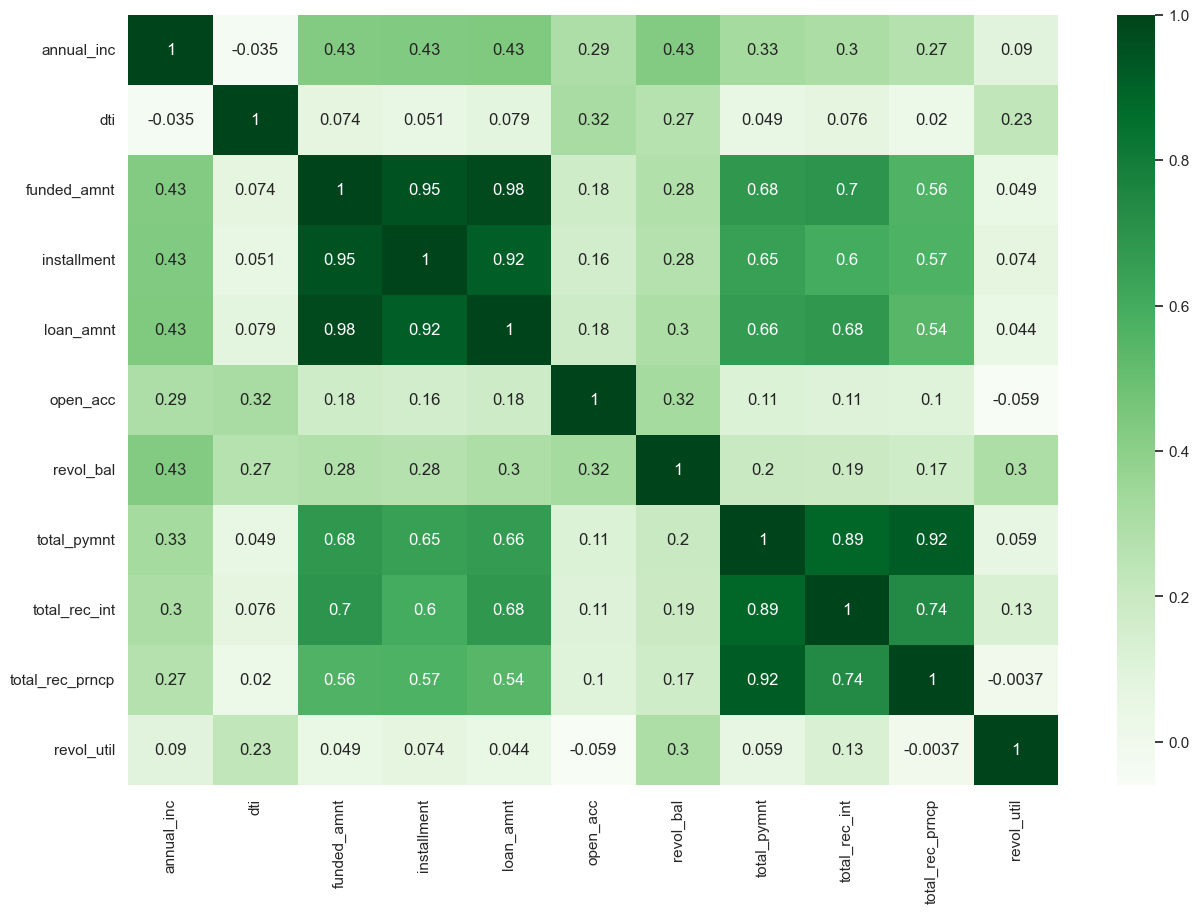

In [200]:
# Plotting the Correlation Using Heatmap for Charged off Data

plt.figure(figsize = (15,10))
sns.heatmap(Ch_Loan_Corr, cmap = 'Greens', annot = True)
plt.show()

### Observation

- Annual Income is Negatively Correlated with DTI

In [202]:
# Determing the Correlation between Numerical Columns in the Fully Paid Data Frame

Fp_Loan_Corr = fullyPaid_df[numerical_columns].corr()
Fp_Loan_Corr

annual_inc       dti  funded_amnt  installment  loan_amnt  \
annual_inc         1.000000 -0.080321     0.382084     0.376835   0.386711   
dti               -0.080321  1.000000     0.091399     0.082041   0.091166   
funded_amnt        0.382084  0.091399     1.000000     0.957704   0.980079   
installment        0.376835  0.082041     0.957704     1.000000   0.929118   
loan_amnt          0.386711  0.091166     0.980079     0.929118   1.000000   
open_acc           0.264026  0.301873     0.169370     0.160447   0.171685   
revol_bal          0.389285  0.269286     0.300720     0.298438   0.307958   
total_pymnt        0.367296  0.106058     0.983767     0.923400   0.966008   
total_rec_int      0.247755  0.128241     0.733484     0.631362   0.725842   
total_rec_prncp    0.382084  0.091399     1.000000     0.957704   0.980079   
revol_util         0.047411  0.282651     0.078831     0.109538   0.073384   

                 open_acc  revol_bal  total_pymnt  total_rec_int  \
annual_inc       0.264026   0.389285     0.367296       0.247755   
dti              0.301873   0.269286     0.106058       0.128241   
funded_amnt      0.169370   0.300720     0.983767       0.733484   
installment      0.160447   0.298438     0.923400       0.631362   
loan_amnt        0.171685   0.307958     0.966008       0.725842   
open_acc         1.000000   0.286208     0.161262       0.103986   
revol_bal        0.286208   1.000000     0.298653       0.231262   
total_pymnt      0.161262   0.298653     1.000000       0.843549   
total_rec_int    0.103986   0.231262     0.843549       1.000000   
total_rec_prncp  0.169370   0.300720     0.983767       0.733482   
revol_util      -0.098148   0.317661     0.120209       0.219370   

                 total_rec_prncp  revol_util  
annual_inc              0.382084    0.047411  
dti                     0.091399    0.282651  
funded_amnt             1.000000    0.078831  
installment             0.957704    0.109538  
loan_amnt               0.980079    0.073384  
open_acc                0.169370   -0.098148  
revol_bal               0.300720    0.317661  
total_pymnt             0.983767    0.120209  
total_rec_int           0.733482    0.219370  
total_rec_prncp         1.000000    0.078831  
revol_util              0.078831    1.000000

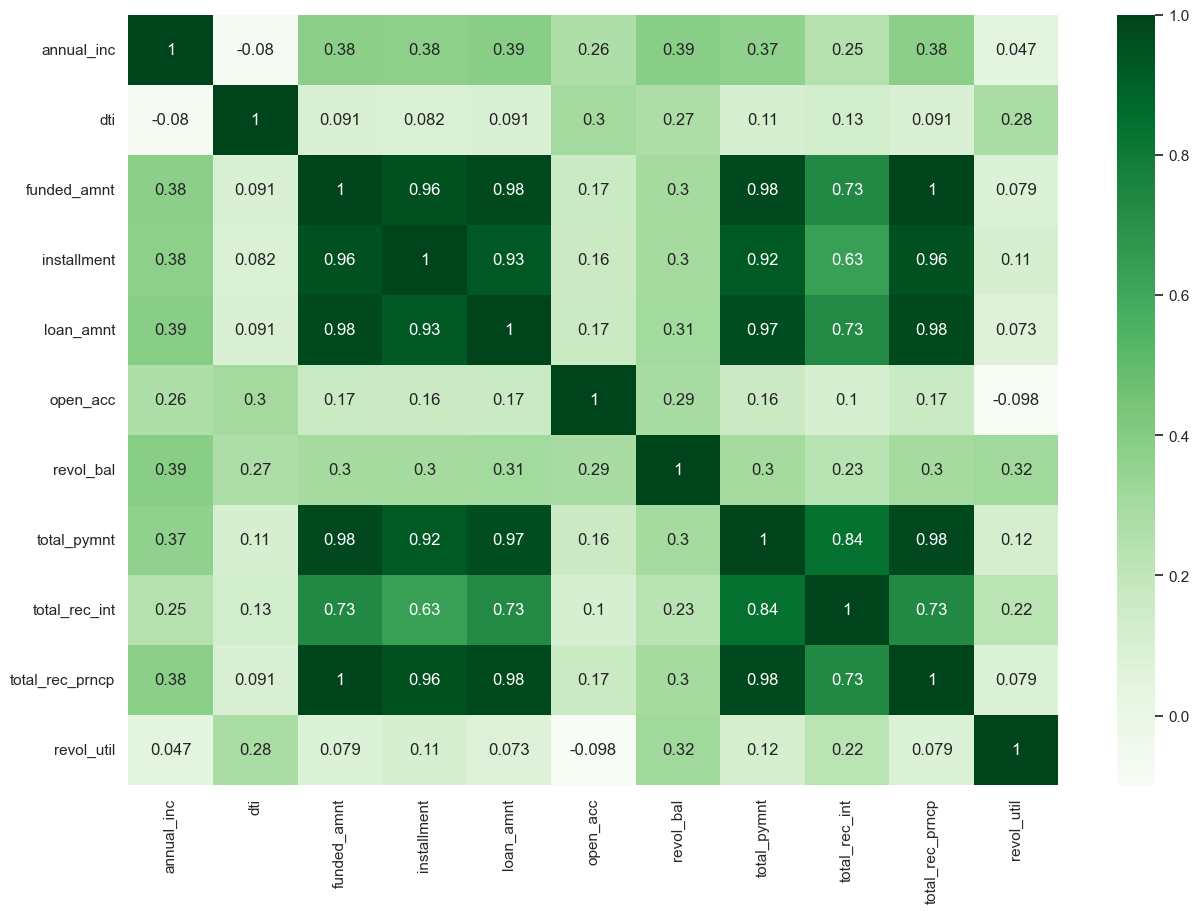

In [203]:
# Plotting the Correlation Using Heatmap for Fully Paid Data

plt.figure(figsize = (15,10))
sns.heatmap(Fp_Loan_Corr, cmap = 'Greens', annot = True)
plt.show()

## Insights

- Most loans have a 36-month term compared to 60 months.
- Interest rates are mainly clustered between 10% and 15%.
- Many loans are given to borrowers with grades 'A' and 'B', indicating that most loans are of high quality.
- Most borrowers have more than 10 years of work experience.
- Most borrowers do not own property; they either have a mortgage or rent.
- Around 50% of borrowers are verified either by the company or through a verified source.
- The annual income distribution is skewed, showing that many borrowers have lower incomes compared to others.
- A significant number of loans are taken out for debt consolidation, followed by credit card debt.
- Many borrowers come from large urban areas like California, New York, Florida, and Texas.
- Most borrowers have a high debt-to-income ratio (DTI), mainly between 10 and 15.
- More loans are approved in the last quarter of the year.
- The number of approved loans is growing rapidly over time, suggesting that loan approvals are increasing.
- Debt consolidation is the most common reason for loans and has the highest number of fully paid and defaulted loans.
- Loans with a 60-month term are more likely to default, while 36-month term loans are more likely to be fully repaid.
- 36-month loans are primarily grade A and B, while 60-month loans are more often grade B, C, and D.
- Loan status is affected by the DTI ratio, with loans having a 10-15 DTI ratio showing more defaults, but higher DTI ratios are even more likely to default.
- Borrowers who own property have fewer defaulted loans compared to those with a mortgage or rent.
- Borrowers with an annual income below $50,000 are more likely to default, while those with higher incomes are less likely to.
- Defaulted loans tend to increase with interest rates but drop after 17.5%.
- Employees with over 10 years of experience are both more likely to default and more likely to fully pay off their loans.
- The loan grade reflects the risk level, with interest rates increasing as the risk increases.
- Grade A loans, which carry the lowest risk, also tend to have the lowest DTI ratio, meaning that higher-grade loans have fewer defaults.

## Recommendations

Key factors to predict default risk and avoid credit loss:
1. Debt-to-income ratio (DTI)
2. Loan grade
3. Verifi

Additional considerations for defaults:
1. Borrowers from areas outside large urban cities like California, New York, Texas, and Florida.
2. Borrowers with annual incomes between 50000 and 100000.
3. Borrowers with lower grades (E, F, G), indicating higher risk.
4. Borrowers with very high DTI ratios.
5. Borrowers with over 10 years of work experience.ith over 10 years of work experience.
